In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.axes
np.set_printoptions(suppress=True)

In [2]:
data_2019 = pd.read_csv('/Users/richardlee/Downloads/WorkforceUtilizationSummaryReport2019.csv')

In [3]:
data_2020 = pd.read_csv('/Users/richardlee/Downloads/WorkforceUtilizationCraftLevelReport2020.csv')

In [152]:
data_2020_trade = pd.read_csv('/Users/richardlee/Downloads/WorkforceUtilizationSummaryReport2020.csv')

In [4]:
data_2019.head()

,MONTH,YEAR,PROJECT,PROJECT_CODE,CONTRACTOR,CONSTRUCTION_TRADE,CRAFT_LEVEL,TOTAL_EMPLOYEE,CAUCASIAN,AFRICAN_AMERICAN,HISPANIC,ASIAN,NATIVE_AMERICAN,OTHER,NOT_SPECIFIED,TOTAL_FEMALE,TOTAL_MALE,HOURS_WORKED_PER_MONTH
0,1,2019,AEP1802E UT1 C Utility Simple Fix,AEP1802E UT1 C,Rise engineering,INSULATOR (PIPES & TANKS),Journeymen,101.0,7.5,0.0,93.5,0.0,0.0,0.0,0.0,0.0,101.0,HOURS_PER_MONTH
1,1,2019,AEP1802E UT1 C Utility Simple Fix,AEP1802E UT1 C,Rise engineering,INSULATOR (PIPES & TANKS),Apprentice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HOURS_PER_MONTH
2,1,2019,CME0902 DC1 C Chief Medical Examiner Office We...,CME0902 DC1 CM,"Adams plumbing & heating, inc.",PLUMBERS & GASFITTERS,Journeymen,15.5,15.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5,HOURS_PER_MONTH
3,1,2019,CME0902 DC1 C Chief Medical Examiner Office We...,CME0902 DC1 CM,"Adams plumbing & heating, inc.",PLUMBERS & GASFITTERS,Apprentice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HOURS_PER_MONTH
4,1,2019,CME0902 DC1 C Chief Medical Examiner Office We...,CME0902 DC1 CM,Ayotte and king for tile inc.,FLOORCOVERER,Journeymen,26.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,HOURS_PER_MONTH


In [5]:
data_2020.head()

,Unnamed: 0,CRAFT_LEVEL,TOTAL_EMPLOYEE,CAUCASIAN,AFRICAN_AMERICAN,HISPANIC,ASIAN,NATIVE_AMERICAN,OTHER,NOT_SPECIFIED,TOTAL_FEMALE,TOTAL_MALE
0,0,Apprentice,37607.64,28035.14,2430.00,5803.50,713.0,40.0,586.00,0.0,3494.19,34113.45
1,1,Journeymen,437291.78,361819.41,16646.42,45654.77,5264.5,395.5,7503.18,8.0,11189.75,426102.03


In [6]:
app_2019 = data_2019.loc[data_2019['CRAFT_LEVEL'] == 'Apprentice']

In [7]:
cauc_2019 = app_2019['CAUCASIAN'].sum()

In [8]:
afr_2019 = app_2019['AFRICAN_AMERICAN'].sum()

In [9]:
his_2019 = app_2019['HISPANIC'].sum()

In [10]:
asia_2019 = app_2019['ASIAN'].sum()

In [11]:
nat_2019 = app_2019['NATIVE_AMERICAN'].sum()

In [12]:
oth_2019 = app_2019['OTHER'].sum()

In [13]:
not_2019 = app_2019['NOT_SPECIFIED'].sum()

In [14]:
eth_2019 = np.array([cauc_2019, afr_2019, his_2019, asia_2019, nat_2019, oth_2019, not_2019])

In [15]:
fem_2019 = app_2019['TOTAL_FEMALE'].sum()
male_2019 = app_2019['TOTAL_MALE'].sum()

In [16]:
gen_a_2019 = np.array([fem_2019, male_2019])

In [17]:
jou_2019 = data_2019.loc[data_2019['CRAFT_LEVEL'] == 'Journeymen']

In [18]:
cauc_j_2019 = jou_2019['CAUCASIAN'].sum()
afr_j_2019 = jou_2019['AFRICAN_AMERICAN'].sum()
his_j_2019 = jou_2019['HISPANIC'].sum()
asia_j_2019 = jou_2019['ASIAN'].sum()
nat_j_2019 = jou_2019['NATIVE_AMERICAN'].sum()
oth_j_2019 = jou_2019['OTHER'].sum()
not_j_2019 = jou_2019['NOT_SPECIFIED'].sum()
fem_j_2019 = jou_2019['TOTAL_FEMALE'].sum()
male_j_2019 = jou_2019['TOTAL_MALE'].sum()

In [19]:
eth_j_2019 = np.array([cauc_j_2019, afr_j_2019, his_j_2019, asia_j_2019, nat_j_2019, oth_j_2019, not_j_2019])

In [20]:
gen_j_2019 = np.array([fem_j_2019, male_j_2019])

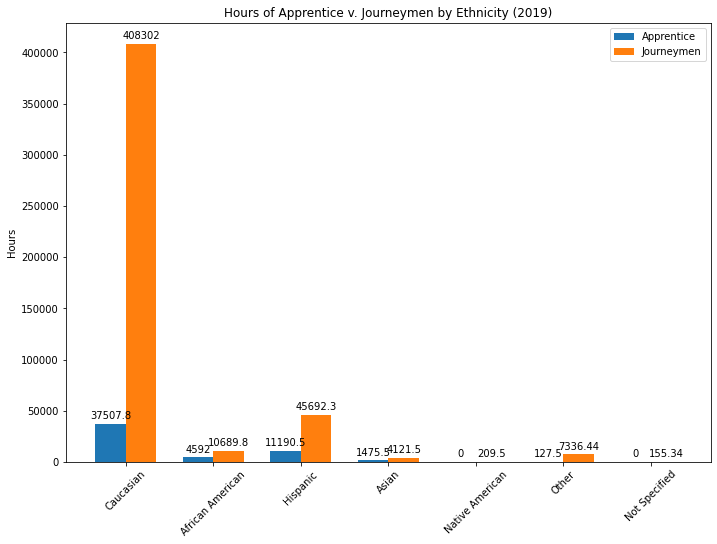

In [21]:
data_a = eth_2019
data_j = eth_j_2019
eths = ['Caucasian', 'African American', 'Hispanic', 'Asian', 'Native American', 'Other', 'Not Specified']

x = np.arange(len(eths))
width = 0.35

fig, ax= plt.subplots()
app_bar = ax.bar(x - width/2, data_a, width, label='Apprentice')
j_bar = ax.bar(x + width/2, data_j, width, label='Journeymen')

ax.set_ylabel('Hours')
ax.set_title('Hours of Apprentice v. Journeymen by Ethnicity (2019)')
ax.set_xticks(x)
ax.set_xticklabels(eths, rotation=45, zorder=100)
ax.legend()

ax.bar_label(app_bar, padding=3)
ax.bar_label(j_bar, padding=3)

fig.tight_layout()
fig.set_size_inches(11,10)
# filepath = '/Users/richardlee/Desktop/eth_hours_19.png'
# plt.savefig(filepath, bbox_inches='tight', dpi=150)

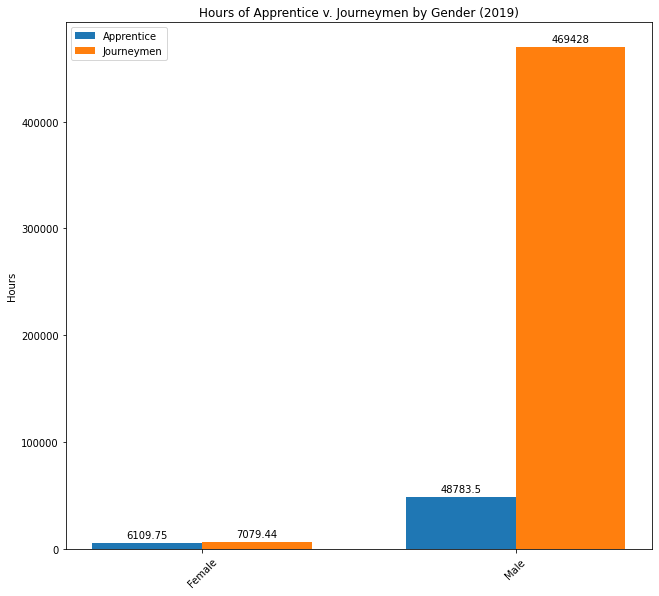

In [22]:
data_a = gen_a_2019
data_j = gen_j_2019
genders = ['Female', 'Male']

x = np.arange(len(genders))
width = 0.35

fig, ax= plt.subplots()
app_bar = ax.bar(x - width/2, data_a, width, label='Apprentice')
j_bar = ax.bar(x + width/2, data_j, width, label='Journeymen')

ax.set_ylabel('Hours')
ax.set_title('Hours of Apprentice v. Journeymen by Gender (2019)')
ax.set_xticks(x)
ax.set_xticklabels(genders, rotation=45, zorder=100)
ax.legend()

ax.bar_label(app_bar, padding=3)
ax.bar_label(j_bar, padding=3)

fig.tight_layout()
fig.set_size_inches(10,10)
# filepath = '/Users/richardlee/Desktop/gen_hours_19.png'
# plt.savefig(filepath, bbox_inches='tight', dpi=150)

In [23]:
app_2020 = data_2020.loc[data_2019['CRAFT_LEVEL'] == 'Apprentice']
jou_2020 = data_2020.loc[data_2019['CRAFT_LEVEL'] == 'Journeymen']

In [24]:
cauc_j_2020 = jou_2020['CAUCASIAN'].sum()
afr_j_2020 = jou_2020['AFRICAN_AMERICAN'].sum()
his_j_2020 = jou_2020['HISPANIC'].sum()
asia_j_2020 = jou_2020['ASIAN'].sum()
nat_j_2020 = jou_2020['NATIVE_AMERICAN'].sum()
oth_j_2020 = jou_2020['OTHER'].sum()
not_j_2020 = jou_2020['NOT_SPECIFIED'].sum()
fem_j_2020 = jou_2020['TOTAL_FEMALE'].sum()
male_j_2020 = jou_2020['TOTAL_MALE'].sum()

In [25]:
cauc_a_2020 = app_2020['CAUCASIAN'].sum()
afr_a_2020 = app_2020['AFRICAN_AMERICAN'].sum()
his_a_2020 = app_2020['HISPANIC'].sum()
asia_a_2020 = app_2020['ASIAN'].sum()
nat_a_2020 = app_2020['NATIVE_AMERICAN'].sum()
oth_a_2020 = app_2020['OTHER'].sum()
not_a_2020 = app_2020['NOT_SPECIFIED'].sum()
fem_a_2020 = app_2020['TOTAL_FEMALE'].sum()
male_a_2020 = app_2020['TOTAL_MALE'].sum()

In [26]:
eth_j_2020 = np.array([cauc_j_2020, afr_j_2020, his_j_2020, asia_j_2020, nat_j_2020, oth_j_2020, not_j_2020])

In [27]:
eth_a_2020 = np.array([cauc_a_2020, afr_a_2020, his_a_2020, asia_a_2020, nat_a_2020, oth_a_2020, not_a_2020])

In [28]:
fem_a_2020 = app_2020['TOTAL_FEMALE'].sum()
male_a_2020 = app_2020['TOTAL_MALE'].sum()
fem_j_2020 = jou_2020['TOTAL_FEMALE'].sum()
male_j_2020 = jou_2020['TOTAL_MALE'].sum()
gen_a_2020 = np.array([fem_a_2020, male_a_2020])
gen_j_2020 = np.array([fem_j_2020, male_j_2020])

In [29]:
cauc_j_2020

28035.14

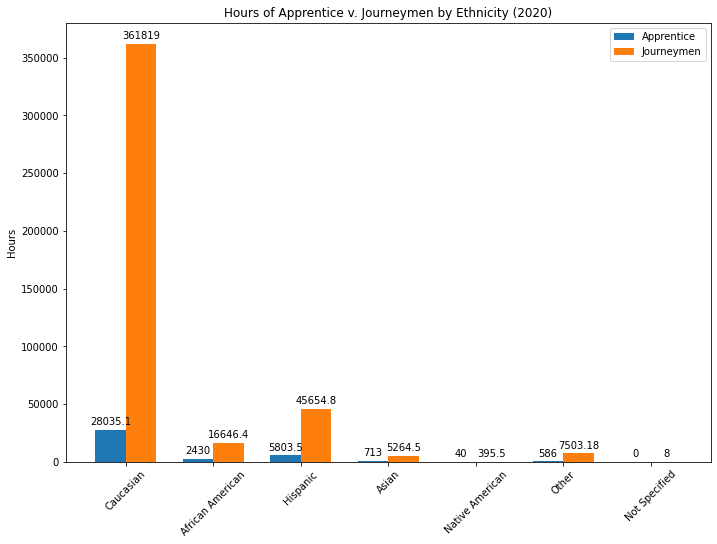

In [30]:
data_a = eth_a_2020
data_j = eth_j_2020
eths = ['Caucasian', 'African American', 'Hispanic', 'Asian', 'Native American', 'Other', 'Not Specified']

x = np.arange(len(eths))
width = 0.35

fig, ax= plt.subplots()
app_bar = ax.bar(x - width/2, data_j, width, label='Apprentice')
j_bar = ax.bar(x + width/2, data_a, width, label='Journeymen')

ax.set_ylabel('Hours')
ax.set_title('Hours of Apprentice v. Journeymen by Ethnicity (2020)')
ax.set_xticks(x)
ax.set_xticklabels(eths, rotation=45, zorder=100)
ax.legend()

ax.bar_label(app_bar, padding=3)
ax.bar_label(j_bar, padding=3)

fig.tight_layout()
fig.set_size_inches(11,10)
# filepath = '/Users/richardlee/Desktop/eth_hours_20.png'
# plt.savefig(filepath, bbox_inches='tight', dpi=150)

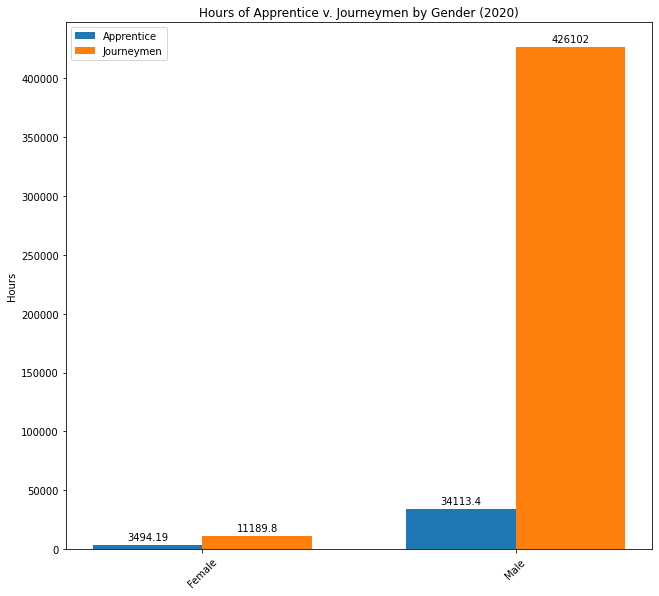

In [31]:
data_a = gen_a_2020
data_j = gen_j_2020
genders = ['Female', 'Male']

x = np.arange(len(genders))
width = 0.35

fig, ax= plt.subplots()
app_bar = ax.bar(x - width/2, data_j, width, label='Apprentice')
j_bar = ax.bar(x + width/2, data_a, width, label='Journeymen')

ax.set_ylabel('Hours')
ax.set_title('Hours of Apprentice v. Journeymen by Gender (2020)')
ax.set_xticks(x)
ax.set_xticklabels(genders, rotation=45, zorder=100)
ax.legend()

ax.bar_label(app_bar, padding=3)
ax.bar_label(j_bar, padding=3)

fig.tight_layout()
fig.set_size_inches(10,10)
# filepath = '/Users/richardlee/Desktop/gen_hours_20.png'
# plt.savefig(filepath, bbox_inches='tight', dpi=150)

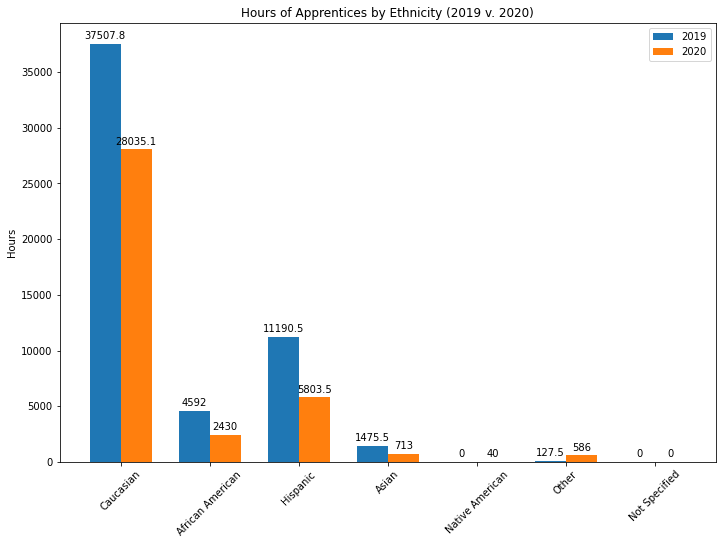

In [32]:
data_a = eth_2019
data_a_2020 = eth_j_2020
eths = ['Caucasian', 'African American', 'Hispanic', 'Asian', 'Native American', 'Other', 'Not Specified']

x = np.arange(len(eths))
width = 0.35

fig, ax= plt.subplots()
app_bar = ax.bar(x - width/2, data_a, width, label='2019')
j_bar = ax.bar(x + width/2, data_a_2020, width, label='2020')

ax.set_ylabel('Hours')
ax.set_title('Hours of Apprentices by Ethnicity (2019 v. 2020)')
ax.set_xticks(x)
ax.set_xticklabels(eths, rotation=45, zorder=100)
ax.legend()

ax.bar_label(app_bar, padding=3)
ax.bar_label(j_bar, padding=3)

fig.tight_layout()
fig.set_size_inches(11,10)
# filepath = '/Users/richardlee/Desktop/eth_hours_a.png'
# plt.savefig(filepath, bbox_inches='tight', dpi=150)

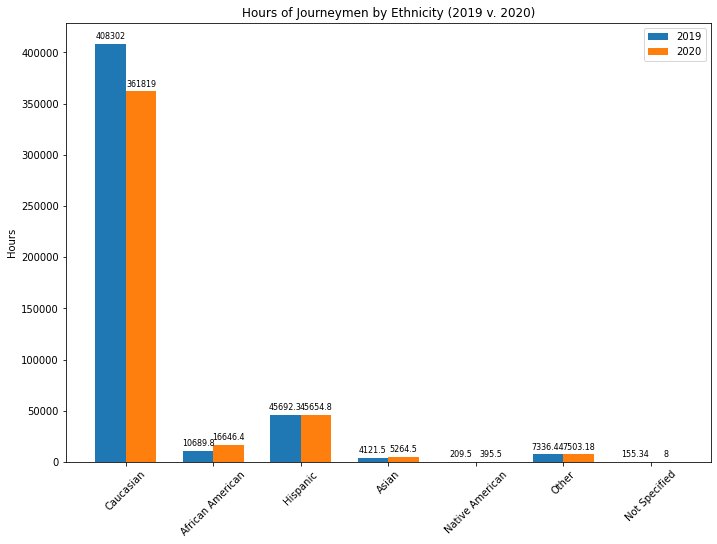

In [33]:
data_a = eth_j_2019
data_a_2020 = eth_a_2020
eths = ['Caucasian', 'African American', 'Hispanic', 'Asian', 'Native American', 'Other', 'Not Specified']

x = np.arange(len(eths))
width = 0.35

fig, ax= plt.subplots()
app_bar = ax.bar(x - width/2, data_a, width, label='2019')
j_bar = ax.bar(x + width/2, data_a_2020, width, label='2020')

ax.set_ylabel('Hours')
ax.set_title('Hours of Journeymen by Ethnicity (2019 v. 2020)')
ax.set_xticks(x)
ax.set_xticklabels(eths, rotation=45, zorder=100)
ax.legend()

ax.bar_label(app_bar, padding=3, fontsize =8)
ax.bar_label(j_bar, padding=3, fontsize = 8)

fig.tight_layout()
fig.set_size_inches(11,10)
# filepath = '/Users/richardlee/Desktop/eth_hours_j.png'
# plt.savefig(filepath, bbox_inches='tight', dpi=150)

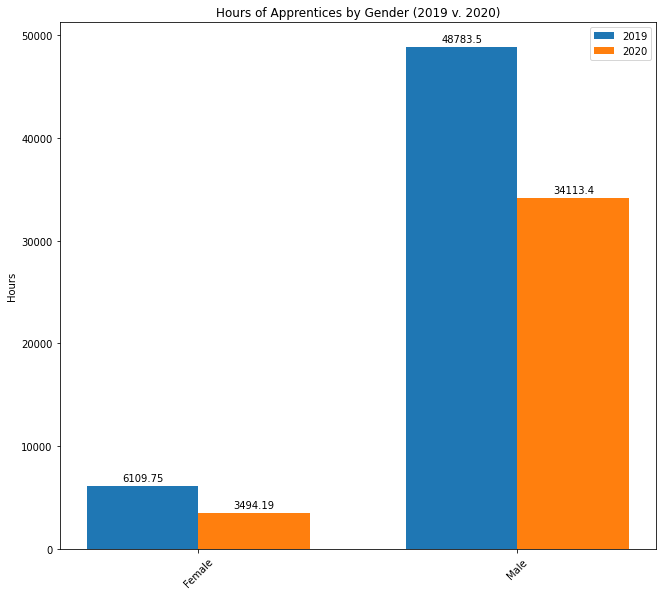

In [34]:
data_a = gen_a_2019
data_j = gen_j_2020
genders = ['Female', 'Male']

x = np.arange(len(genders))
width = 0.35

fig, ax= plt.subplots()
app_bar = ax.bar(x - width/2, data_a, width, label='2019')
j_bar = ax.bar(x + width/2, data_j, width, label='2020')

ax.set_ylabel('Hours')
ax.set_title('Hours of Apprentices by Gender (2019 v. 2020)')
ax.set_xticks(x)
ax.set_xticklabels(genders, rotation=45, zorder=100)
ax.legend()

ax.bar_label(app_bar, padding=3)
ax.bar_label(j_bar, padding=3)

fig.tight_layout()
fig.set_size_inches(10,10)
# filepath = '/Users/richardlee/Desktop/gen_hours_a.png'
# plt.savefig(filepath, bbox_inches='tight', dpi=150)

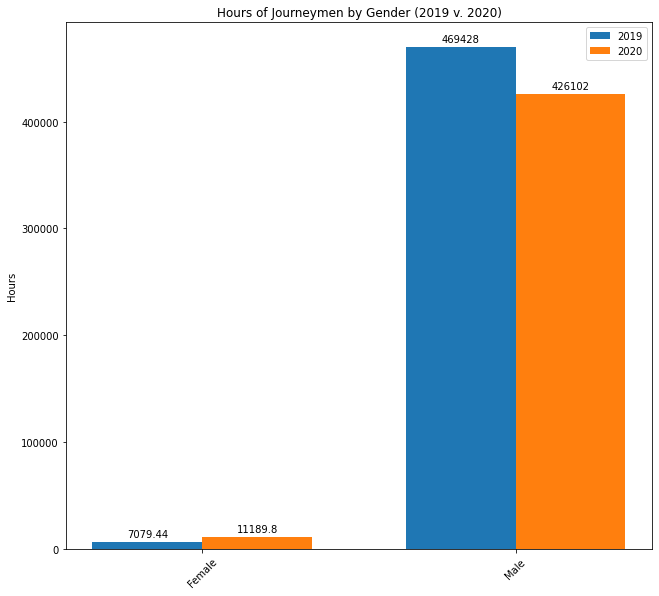

In [35]:
data_a = gen_j_2019
data_j = gen_a_2020
genders = ['Female', 'Male']

x = np.arange(len(genders))
width = 0.35

fig, ax= plt.subplots()
app_bar = ax.bar(x - width/2, data_a, width, label='2019')
j_bar = ax.bar(x + width/2, data_j, width, label='2020')

ax.set_ylabel('Hours')
ax.set_title('Hours of Journeymen by Gender (2019 v. 2020)')
ax.set_xticks(x)
ax.set_xticklabels(genders, rotation=45, zorder=100)
ax.legend()

ax.bar_label(app_bar, padding=3)
ax.bar_label(j_bar, padding=3)

fig.tight_layout()
fig.set_size_inches(10,10)
# filepath = '/Users/richardlee/Desktop/gen_hours_j.png'
# plt.savefig(filepath, bbox_inches='tight', dpi=150)

In [201]:
trade_2019 = data_2019['CONSTRUCTION_TRADE'].unique()

In [186]:
trade_2019

['INSULATOR (PIPES & TANKS)',
 'PLUMBERS & GASFITTERS',
 'FLOORCOVERER',
 'CARPENTER',
 'GLAZIER (GLASS PLANKAIR BARRIERINTERIOR SYSTEMS)',
 'LABORER',
 'CEMENT MASONRYPLASTERING',
 'HVAC (TESTING AND BALANCING - AIR)',
 'ELECTRICIAN',
 'PIPEFITTER',
 'PIPEFITTER & STEAMFITTER',
 'BACKHOEFRONT-END LOADER',
 'BRICKSTONEARTIFICIAL MASONRY',
 'OPERATING ENGINEERS',
 'IRONWORKERWELDER',
 'SHEETMETAL WORKER',
 'TELEDATA WIREMANINSTALLERTECHNICIAN',
 'HVAC MECHANIC',
 'MARBLE & TILE FINISHERS',
 'MARBLE MASONS, TILELAYERS & TERRAZZO MECH',
 'MARBLE- TILE-TERRAZZO MECHANIC',
 'PAINTER  TAPER (BRUSH, NEW)',
 'PAINTER BRUSH NEW',
 'SPRINKLER FITTER',
 'PAINTER  TAPER (BRUSH,REPAINT)',
 'ROOFER',
 'TELECOMMUNICATION TECHNICIAN',
 'FIRE ALARM REPAIR  MAINTENANCE',
 'HVAC (DUCTWORK)',
 'EQUIPMENT OPERATOR (Class A CDL)',
 'LABORER: CARPENTER TENDER',
 'GLAZIER',
 'IRONWORKER',
 'ELEVATOR CONSTRUCTOR',
 'ELEVATOR CONSTRUCTOR HELPER',
 'LABORER: MASON TENDER',
 'MECHANICS MAINTENANCE',
 'DRIVER',
 '

In [202]:
trade_2020 = data_2020_trade['CONSTRUCTION_TRADE'].unique()
# trade_2020 = [s.replace('/', '') for s in trade_2020]

In [203]:
def hours_by_trade(data, trades):
    '''Finds hours for trades by ethnicities'''
    trade_list = []
    for trade in trades:
        const = data.loc[data['CONSTRUCTION_TRADE'] == trade]
        cauc_trade = const['CAUCASIAN'].sum()
        afr_trade = const['AFRICAN_AMERICAN'].sum()
        his_trade = const['HISPANIC'].sum()
        asia_trade = const['ASIAN'].sum()
        nat_trade = const['NATIVE_AMERICAN'].sum()
        oth_trade = const['OTHER'].sum()
        not_trade = const['NOT_SPECIFIED'].sum()
        fem_trade = const['TOTAL_FEMALE'].sum()
        male_trade = const['TOTAL_MALE'].sum()
        trade_list.extend([[trade]] + [[cauc_trade, afr_trade, his_trade, asia_trade, nat_trade, oth_trade, not_trade, fem_trade, male_trade]])
        
    return trade_list

In [222]:
trade_hours_2019 = hours_by_trade(data_2019, trade_2019)

In [205]:
trade_hours_2020 = hours_by_trade(data_2020_trade, trade_2020)

In [206]:
trade_hours_2020

[['PIPEFITTER'],
 [4570.5, 180.0, 526.0, 0.0, 32.0, 0.0, 0.0, 42.0, 5266.5],
 ['PIPEFITTER & STEAMFITTER'],
 [29344.37, 1362.0, 953.0, 37.0, 0.0, 0.0, 0.0, 1572.0, 30124.37],
 ['ASBESTOS INSULATOR (PIPES & TANKS)'],
 [300.5, 0.0, 104.0, 0.0, 0.0, 0.0, 0.0, 0.0, 404.5],
 ['INSULATOR (PIPES & TANKS)'],
 [3822.0, 16.0, 473.5, 0.0, 0.0, 294.0, 0.0, 431.25, 4174.25],
 ['CARPENTER'],
 [48805.24, 1856.92, 3869.25, 0.0, 39.0, 1102.75, 0.0, 1426.0, 54247.16],
 ['LABORER'],
 [70797.92,
  3106.0,
  15895.02,
  585.0,
  15.0,
  4072.04,
  8.0,
  5616.6900000000005,
  88862.29000000001],
 ['OTHER POWER DRIVEN EQUIPMENT - CLASS II'],
 [3925.5, 0.0, 464.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4389.5],
 ['ELECTRICIAN'],
 [88316.25, 5423.25, 6869.5, 2141.0, 220.0, 1135.48, 0.0, 3057.5, 101047.98],
 ['BRICK/STONE/ARTIFICIAL MASONRY'],
 [15286.5, 1816.5, 1148.0, 0.0, 0.0, 8.0, 0.0, 162.0, 18097.0],
 ['LABORER: MASON TENDER'],
 [6772.5, 613.0, 736.5, 0.0, 0.0, 0.0, 0.0, 131.5, 7990.5],
 ['TELECOMMUNICATION TECHNICIAN

In [207]:
trade_hours_2019

[['INSULATOR (PIPES & TANKS)'],
 [4749.0, 176.0, 533.25, 671.0, 0.0, 169.0, 0.0, 19.5, 6278.75],
 ['PLUMBERS & GASFITTERS'],
 [17401.0, 711.0, 281.5, 56.0, 0.0, 0.0, 0.0, 16.0, 18433.5],
 ['FLOORCOVERER'],
 [1411.0, 0.0, 280.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1691.0],
 ['CARPENTER'],
 [95002.95000000001,
  2355.5,
  7014.150000000001,
  343.0,
  112.0,
  1580.5,
  82.57,
  754.5,
  105736.17000000001],
 ['GLAZIER (GLASS PLANK/AIR BARRIER/INTERIOR SYSTEMS)'],
 [3754.27, 10.5, 728.5, 3.5, 0.0, 0.0, 0.0, 0.0, 4496.77],
 ['LABORER'],
 [77255.38,
  1807.75,
  13333.94,
  93.5,
  5.0,
  2035.95,
  0.0,
  6582.4400000000005,
  87949.08],
 ['CEMENT MASONRY/PLASTERING'],
 [3599.0, 0.0, 149.0, 0.0, 0.0, 9.0, 0.0, 10.0, 3747.0],
 ['HVAC (TESTING AND BALANCING - AIR)'],
 [366.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 366.0],
 ['ELECTRICIAN'],
 [68837.15, 2656.75, 9030.0, 1076.5, 0.0, 157.5, 0.0, 1891.0, 79866.9],
 ['PIPEFITTER'],
 [2572.0, 536.0, 967.0, 4.0, 0.0, 48.5, 0.0, 256.0, 3871.5],
 ['PIPEFITTER & ST

In [193]:
trade_hours_2019[1]

[4749.0, 176.0, 533.25, 671.0, 0.0, 169.0, 0.0, 19.5, 6278.75]

[4749.0, 176.0, 533.25, 671.0, 0.0, 169.0, 0.0]
['INSULATOR (PIPES & TANKS)']


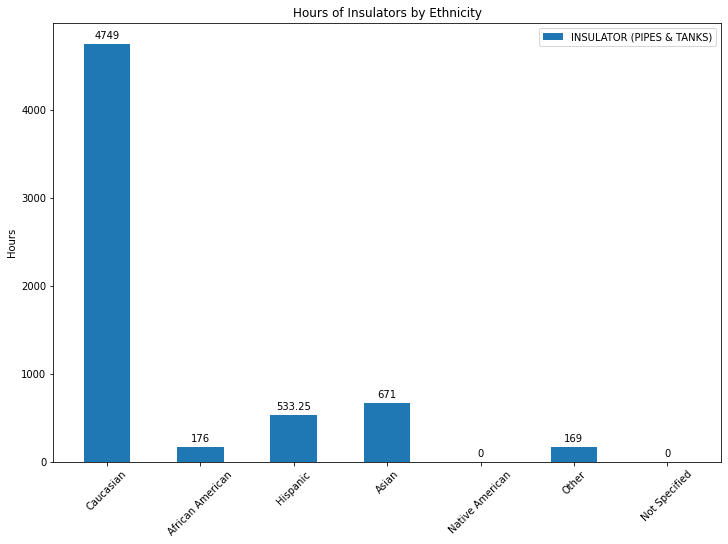

In [194]:
data = trade_hours_2019[1]
trade_name = trade_hours_2019[0]
data2 = []
for i in range(0,7):
    val = float(data[i])
    data2.append(val)
    
print(data2)
    
eths = ['Caucasian', 'African American', 'Hispanic', 'Asian', 'Native American', 'Other', 'Not Specified']

x = np.arange(len(eths))
width = 0.5

fig, ax= plt.subplots()
bar = ax.bar(x, data2,width,  label='INSULATOR (PIPES & TANKS)')
# j_bar = ax.bar(x + width/2, data_a_2020, width, label='2020')

ax.set_ylabel('Hours')
ax.set_title('Hours of Insulators by Ethnicity')
ax.set_xticks(x)
ax.set_xticklabels(eths, rotation=45, zorder=100)
ax.legend()

ax.bar_label(bar, padding=3)

fig.tight_layout()
fig.set_size_inches(11,10)
print(trade_name)

In [236]:
def graph_trade_ethnic_2019(data, trades):
    
    for i in range(0, len(data)):
        if i % 2 != 0:
        
            trade_data = data[i]
            trade_name = data[i-1]
            trade_name = str(trade_name).replace("/", " ")
            data2 = []
            for i in range(0,7):
                val = float(trade_data[i])
                data2.append(val)
    
            eths = ['Caucasian', 'African American', 'Hispanic', 'Asian', 'Native American', 'Other', 'Not Specified']

            x = np.arange(len(eths))
            width = 0.5

            fig, ax= plt.subplots()
            bar = ax.bar(x, data2,width,  label=trade_name)
            # j_bar = ax.bar(x + width/2, data_a_2020, width, label='2020')

            ax.set_ylabel('Hours')
            ax.set_title('Hours of ' + str(trade_name) + ' by Ethnicity (2019)')
            ax.set_xticks(x)
            ax.set_xticklabels(eths, rotation=45, zorder=100)
            ax.legend()

            ax.bar_label(bar, padding=3)

            fig.tight_layout()
            fig.set_size_inches(11,10)
            
            filepath = '/Users/richardlee/Desktop/506_pics/'+str(trade_name)+'2019.png'
            plt.savefig(filepath, bbox_inches='tight', dpi=150)

In [239]:
def graph_trade_ethnic_2020(data, trades):
    
    for i in range(0, len(data)):
        if i % 2 != 0:
        
            trade_data = data[i]
            trade_name = data[i-1]
            trade_name = str(trade_name).replace("/", " ")
            data2 = []
            for i in range(0,7):
                val = float(trade_data[i])
                data2.append(val)
    
            eths = ['Caucasian', 'African American', 'Hispanic', 'Asian', 'Native American', 'Other', 'Not Specified']

            x = np.arange(len(eths))
            width = 0.5

            fig, ax= plt.subplots()
            bar = ax.bar(x, data2,width,  label=trade_name)
            # j_bar = ax.bar(x + width/2, data_a_2020, width, label='2020')

            ax.set_ylabel('Hours')
            ax.set_title('Hours of ' + str(trade_name) + ' by Ethnicity (2020)')
            ax.set_xticks(x)
            ax.set_xticklabels(eths, rotation=45, zorder=100)
            ax.legend()

            ax.bar_label(bar, padding=3)

            fig.tight_layout()
            fig.set_size_inches(11,10)
            
            filepath = '/Users/richardlee/Desktop/506_pics/'+str(trade_name) +'2020.png'
            plt.savefig(filepath, bbox_inches='tight', dpi=150)

<ipython-input-236-e9b74211764f>:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax= plt.subplots()


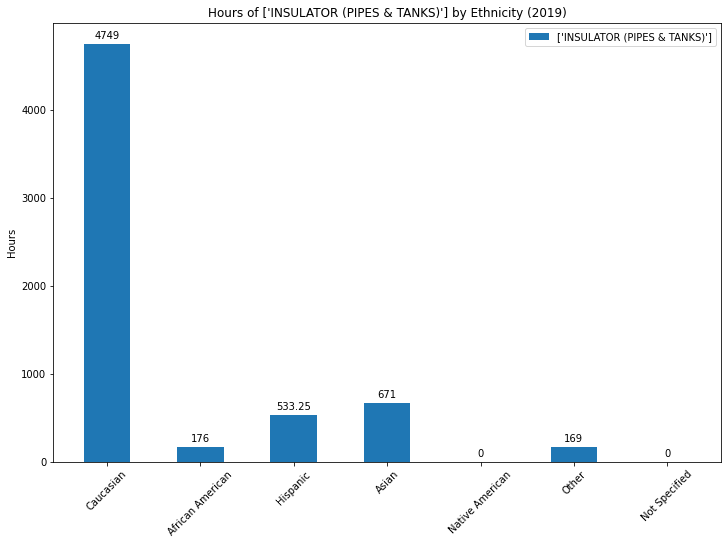

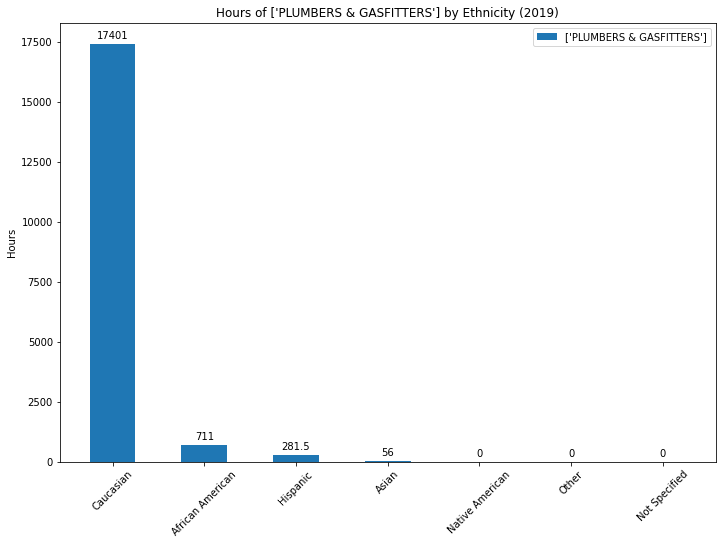

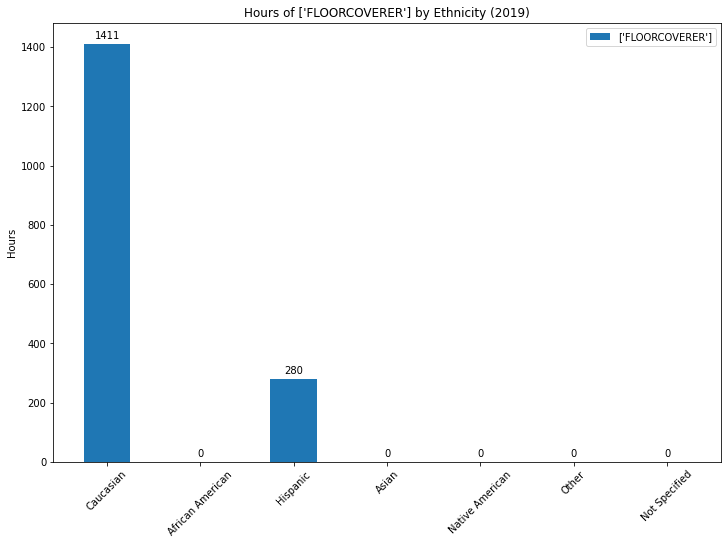

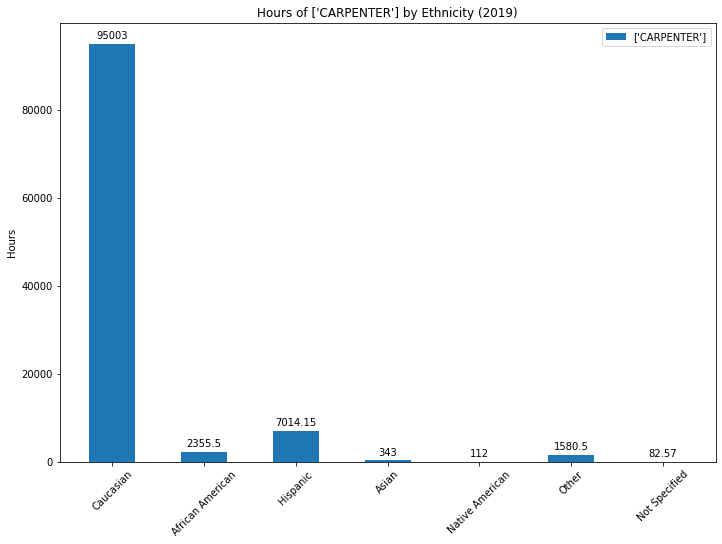

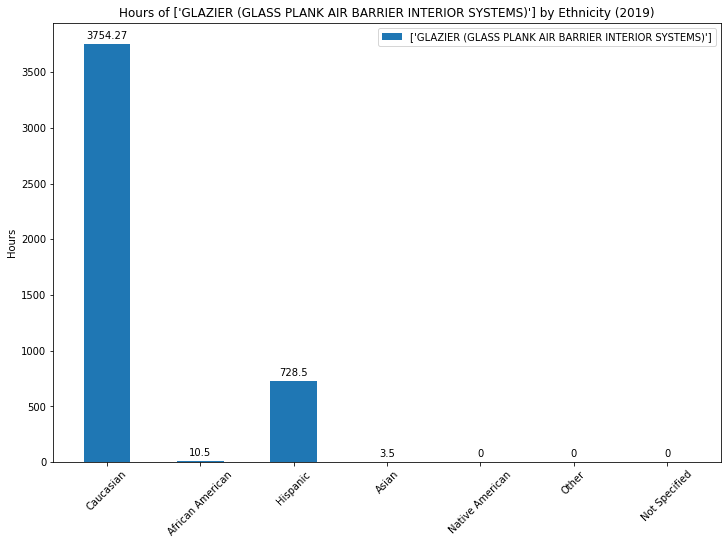

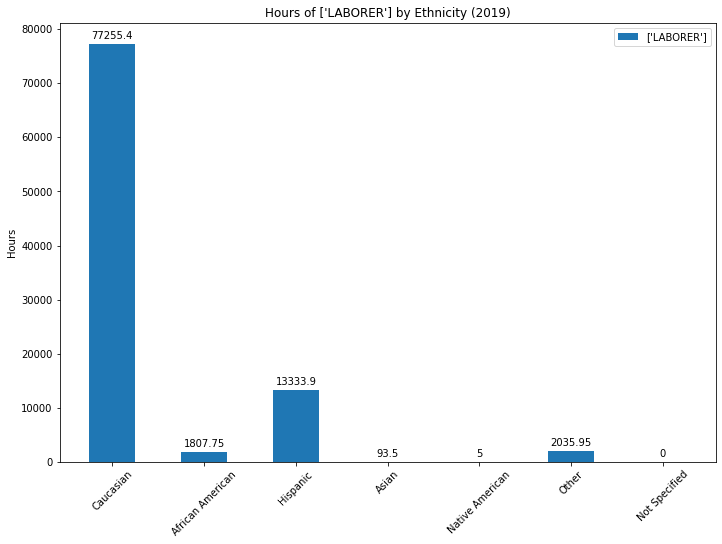

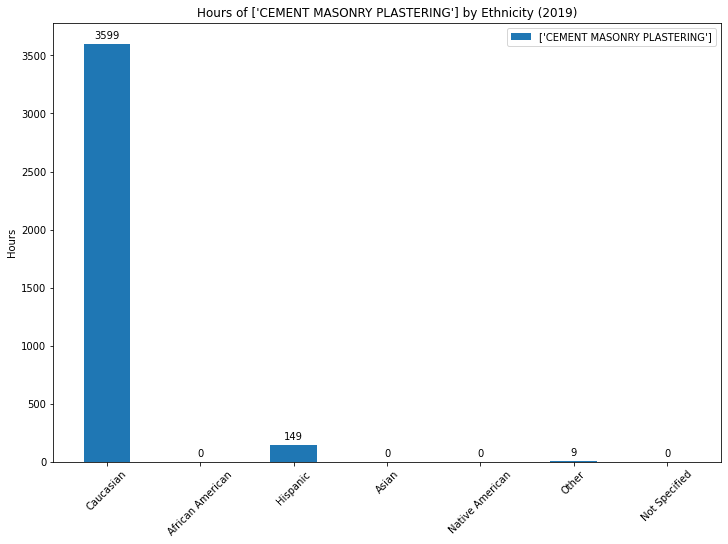

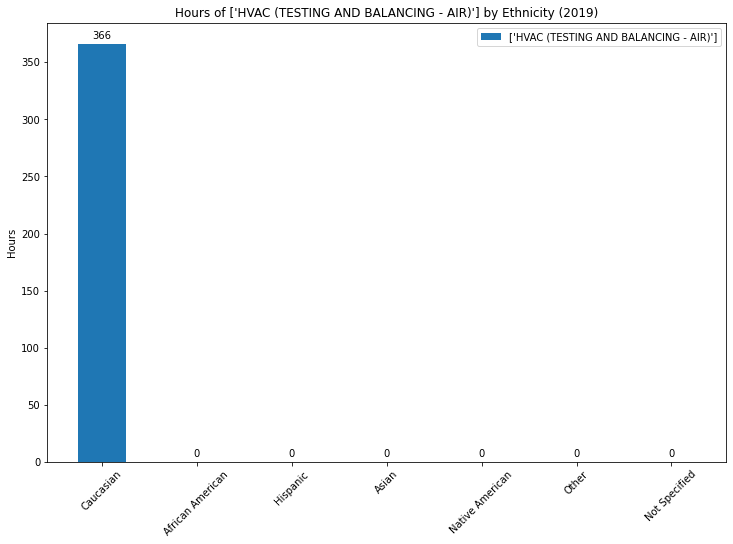

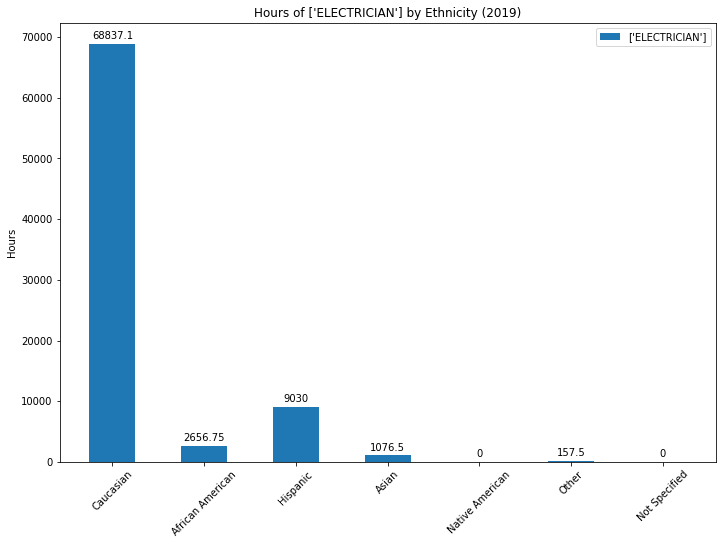

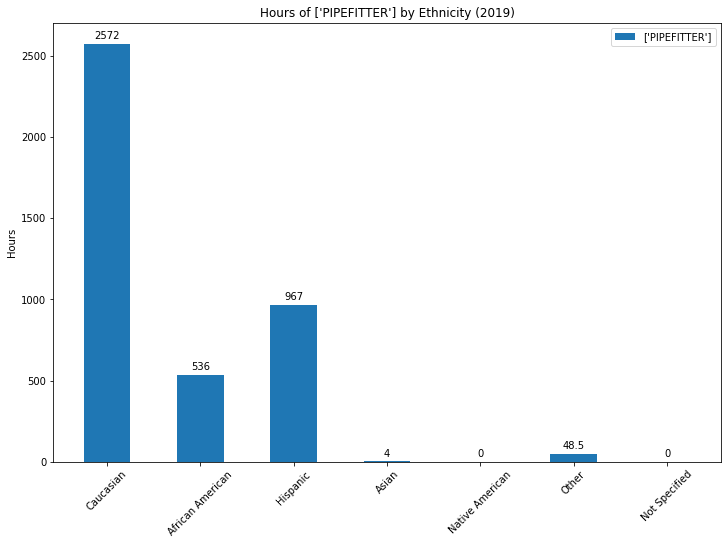

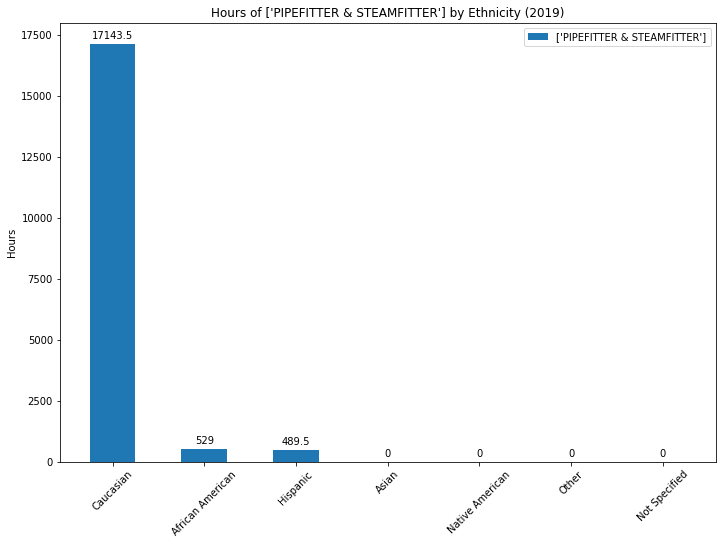

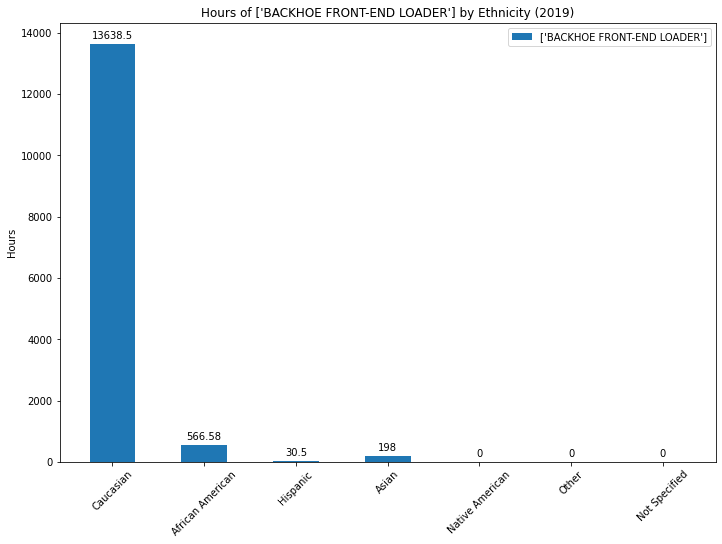

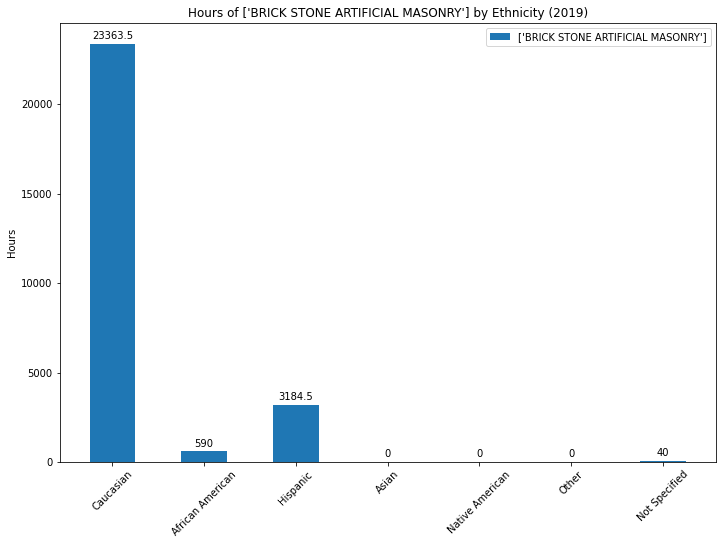

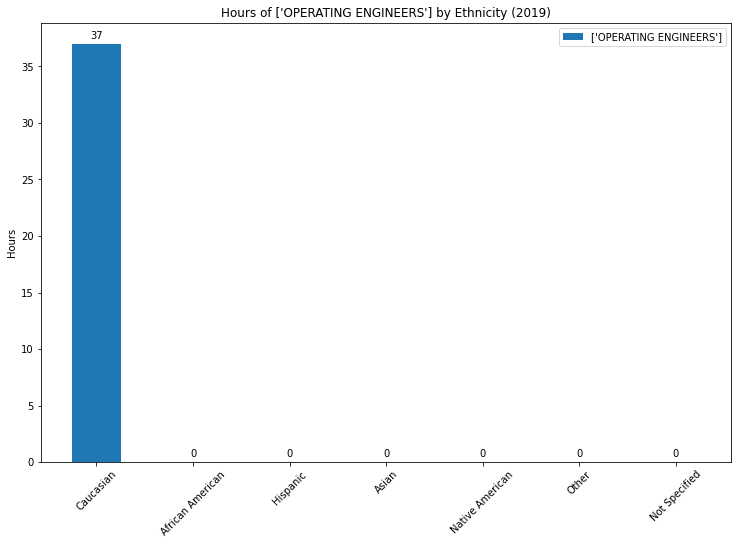

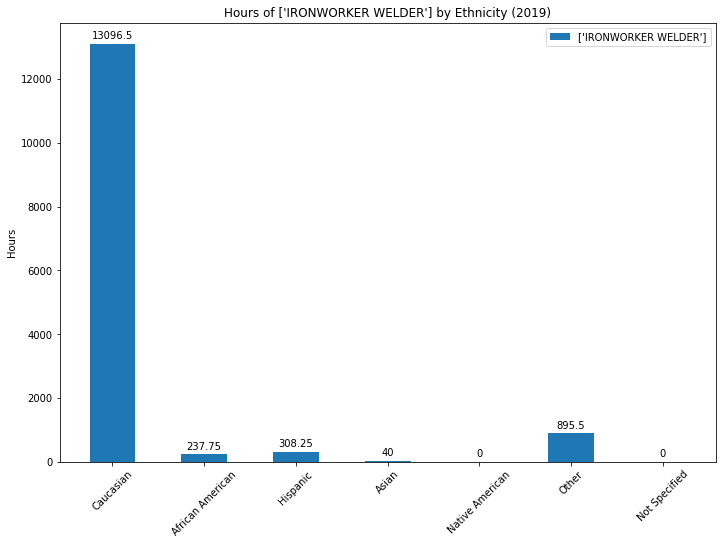

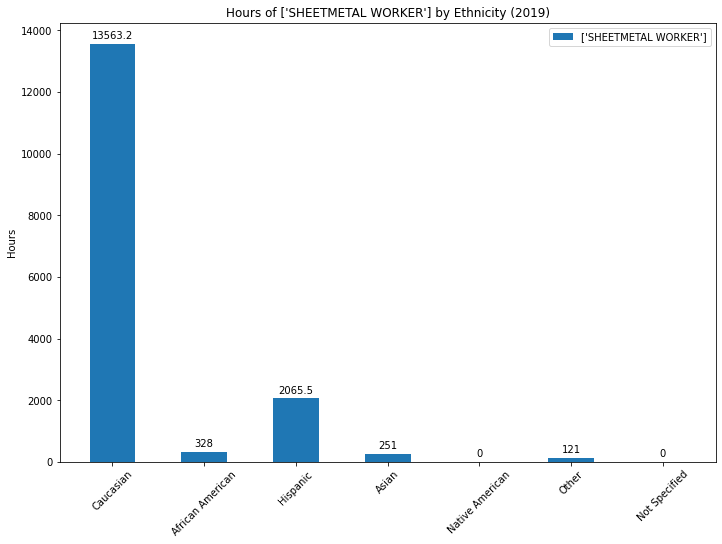

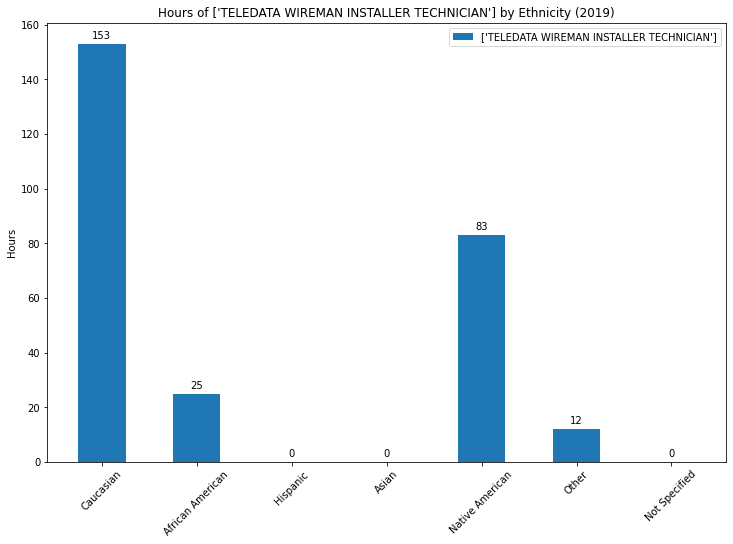

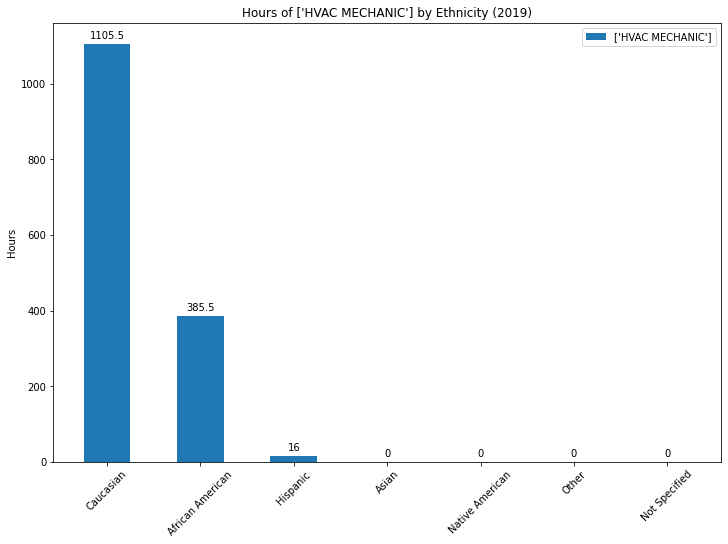

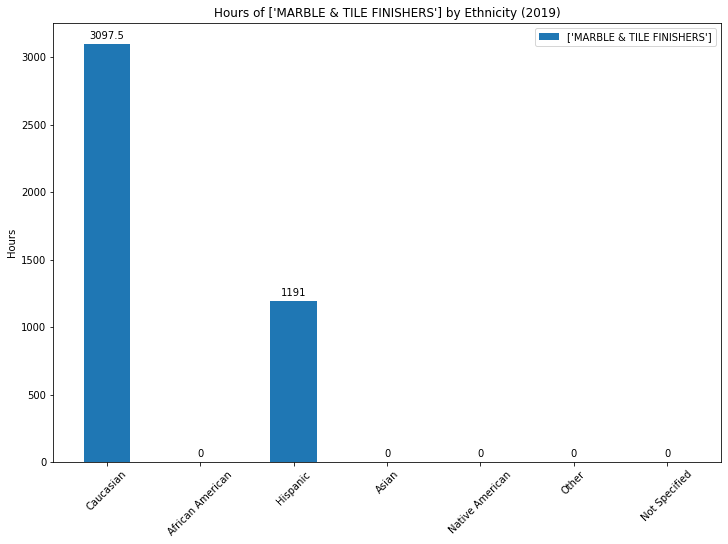

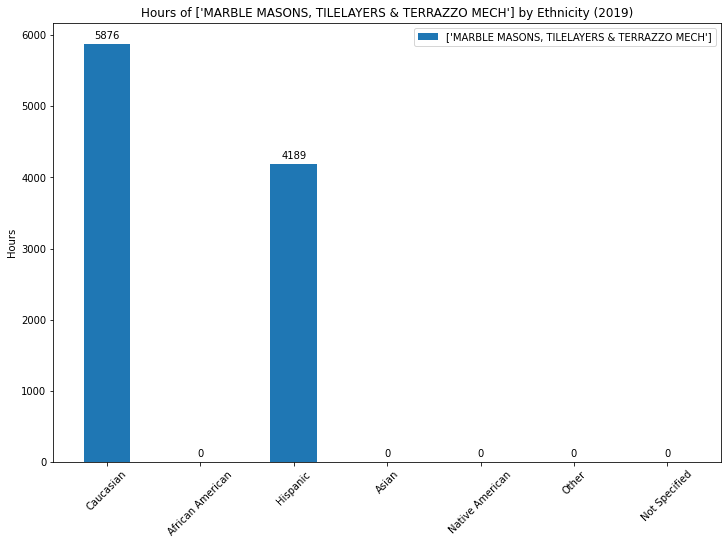

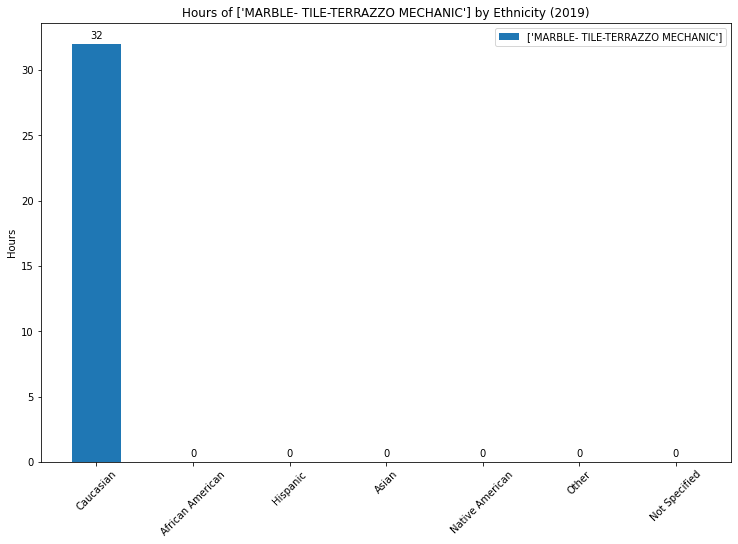

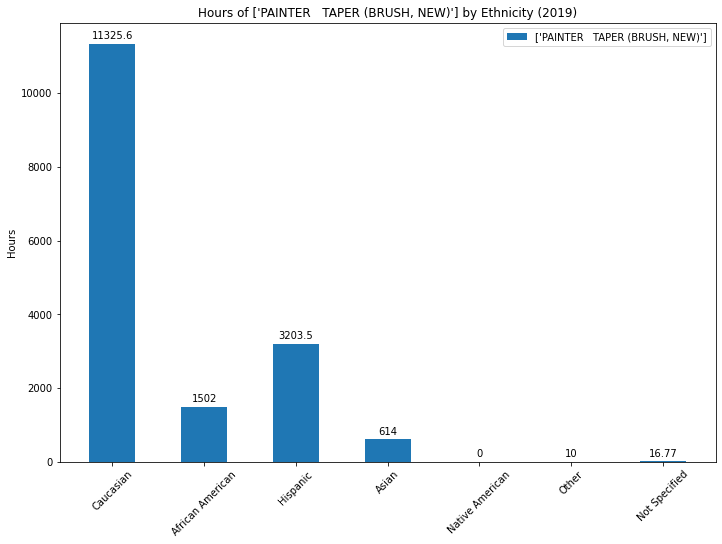

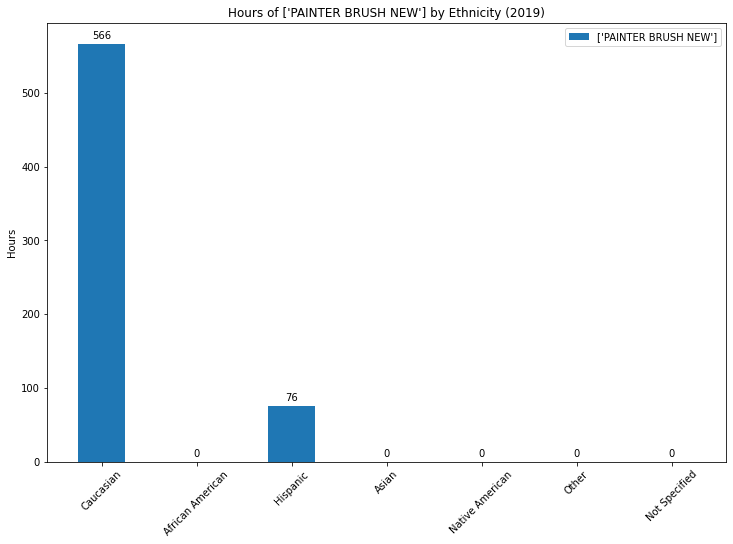

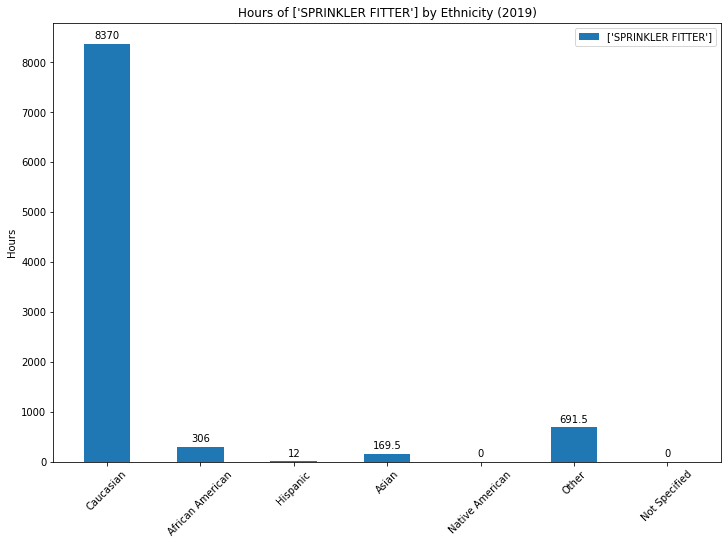

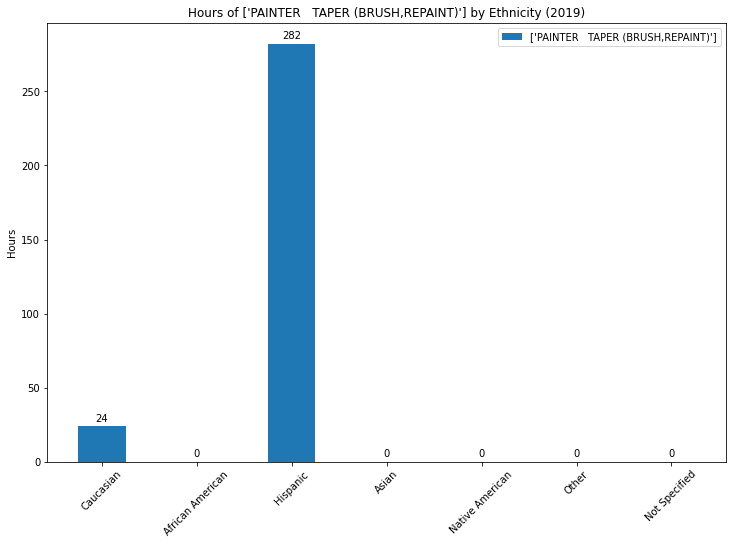

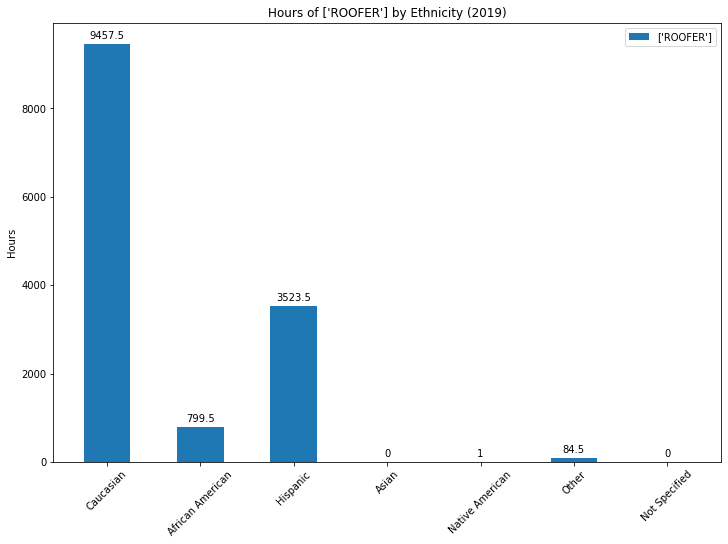

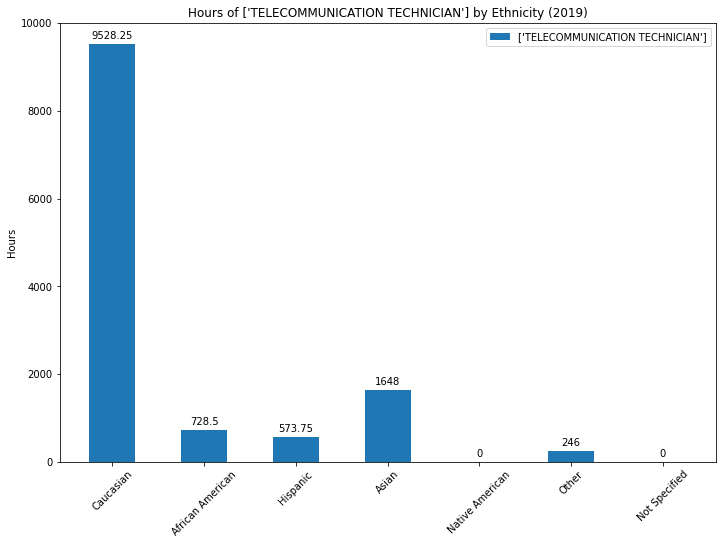

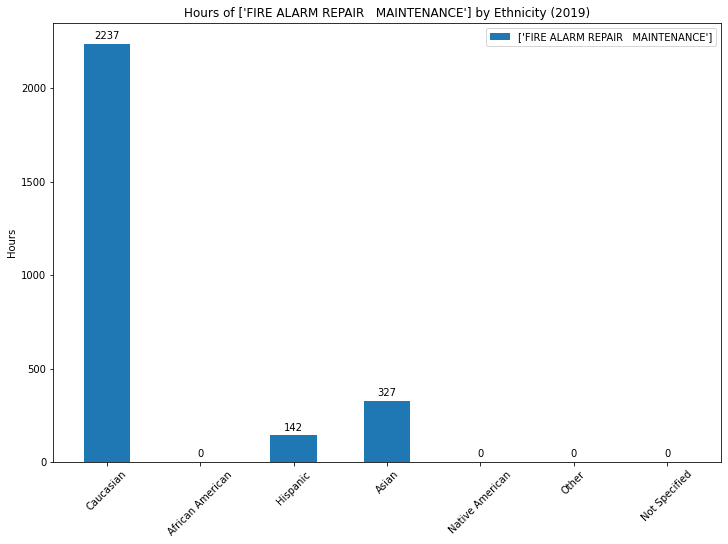

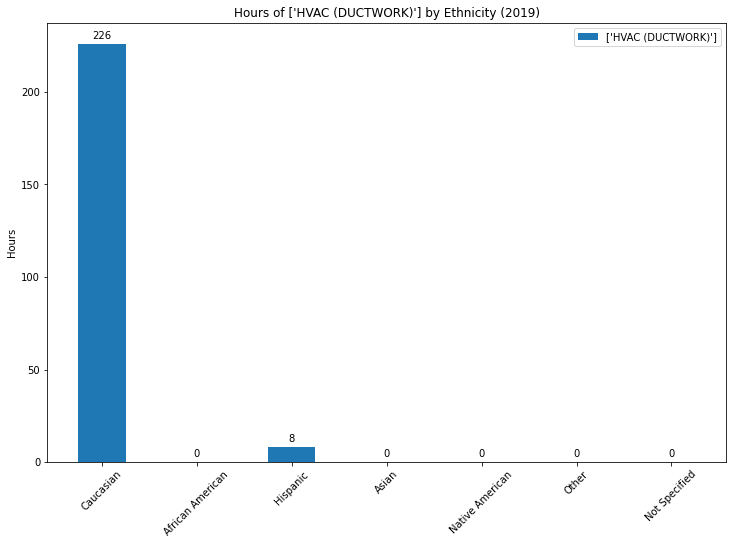

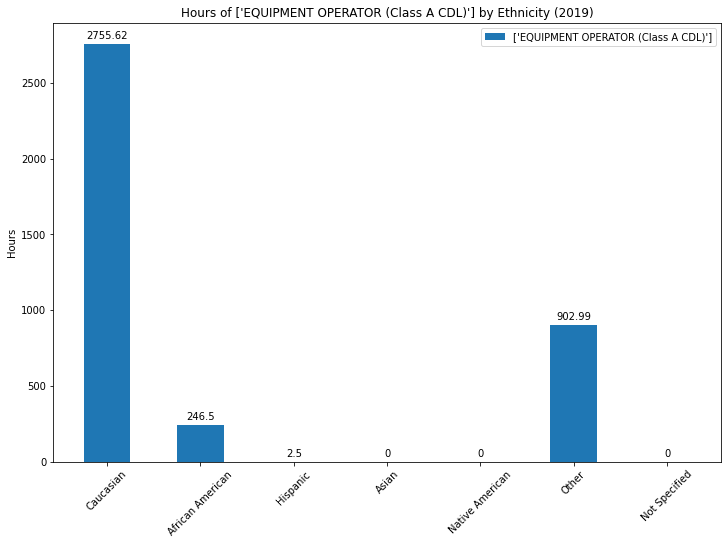

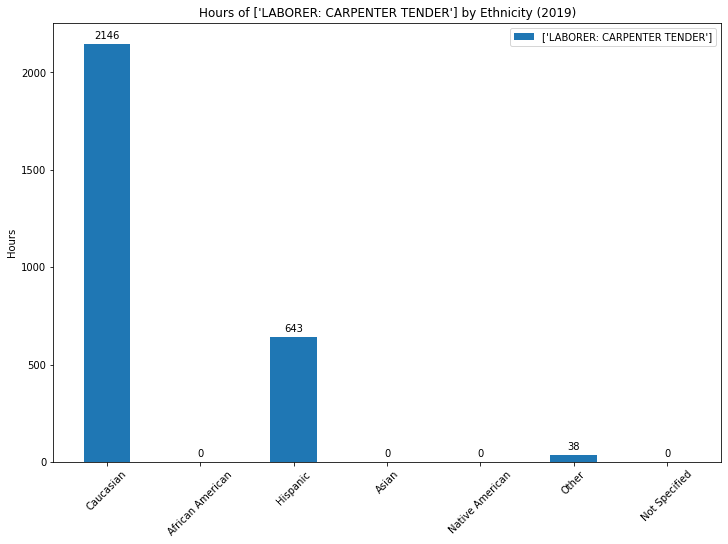

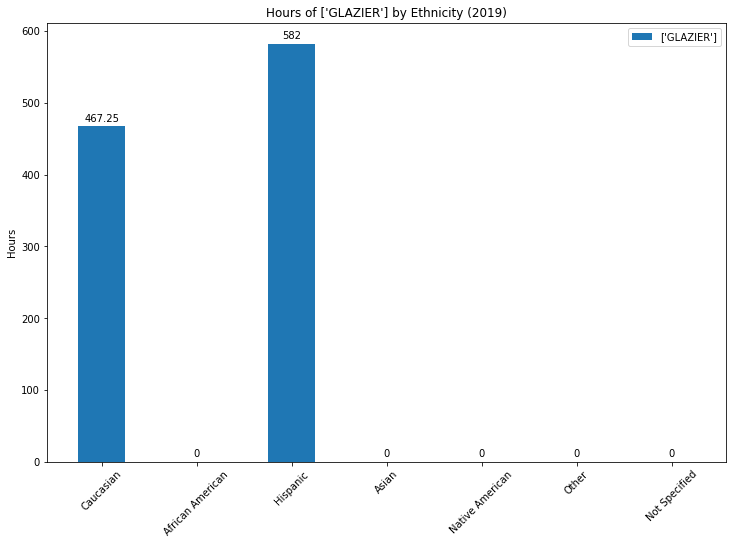

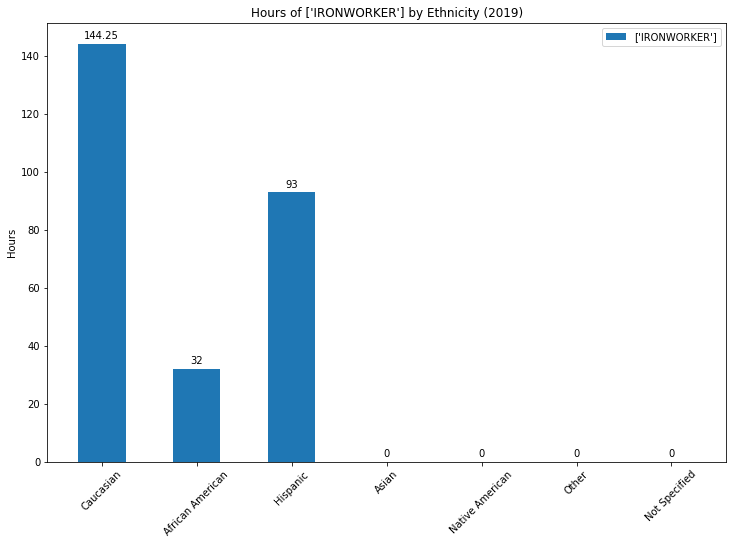

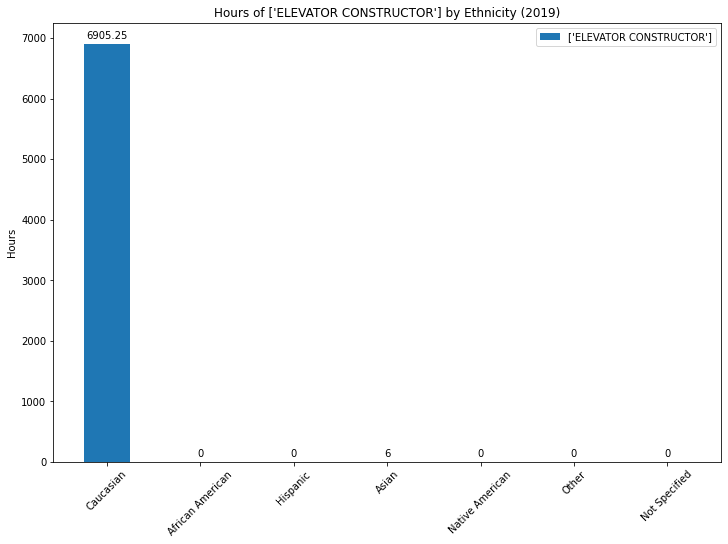

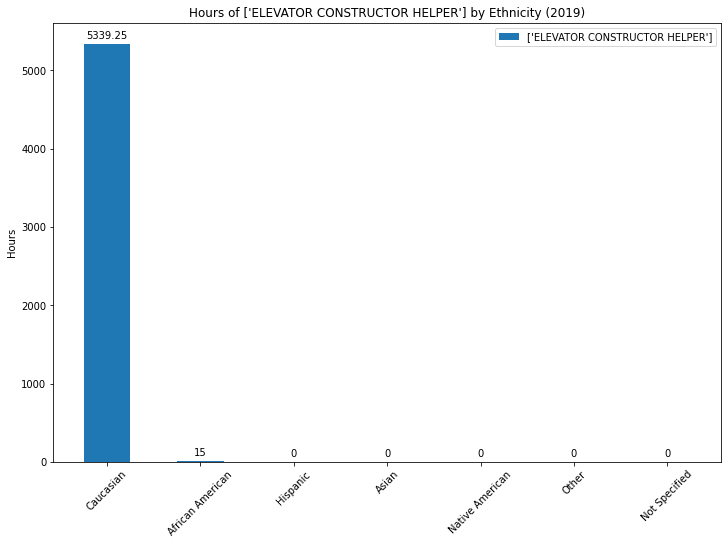

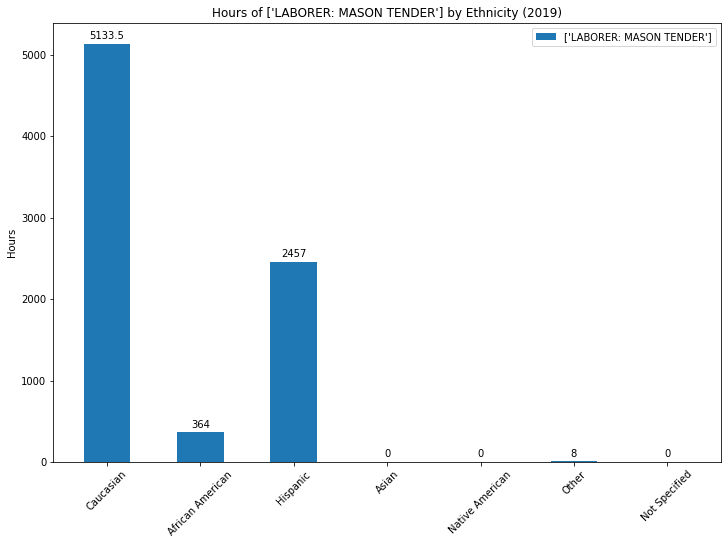

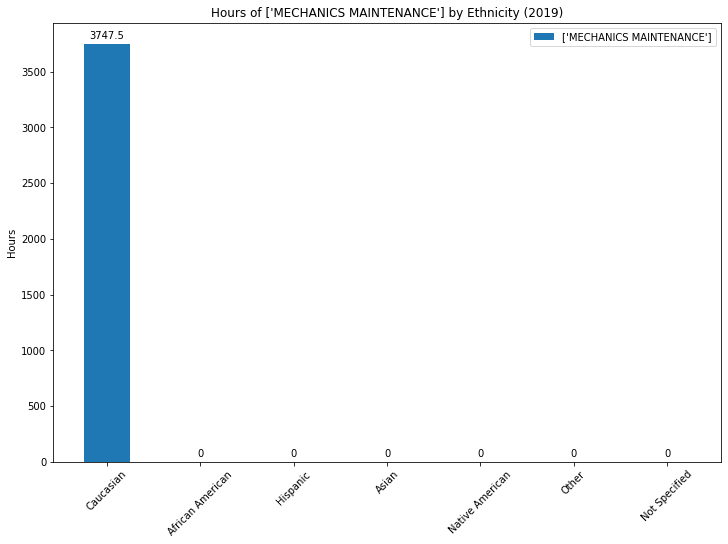

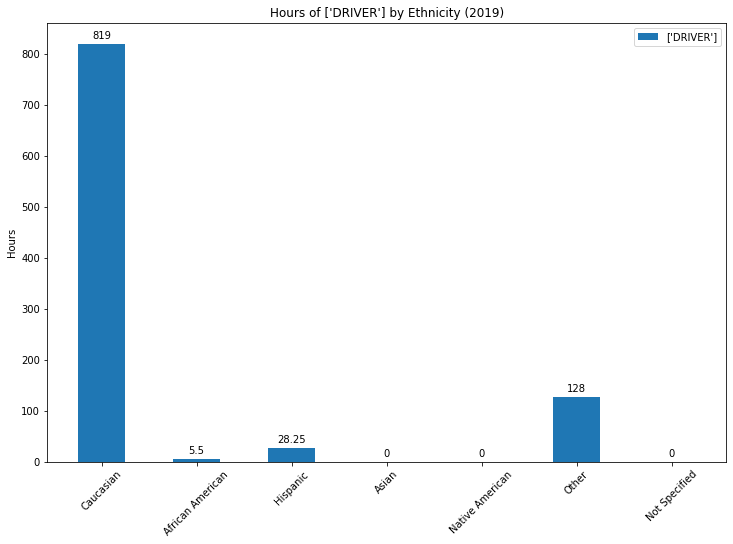

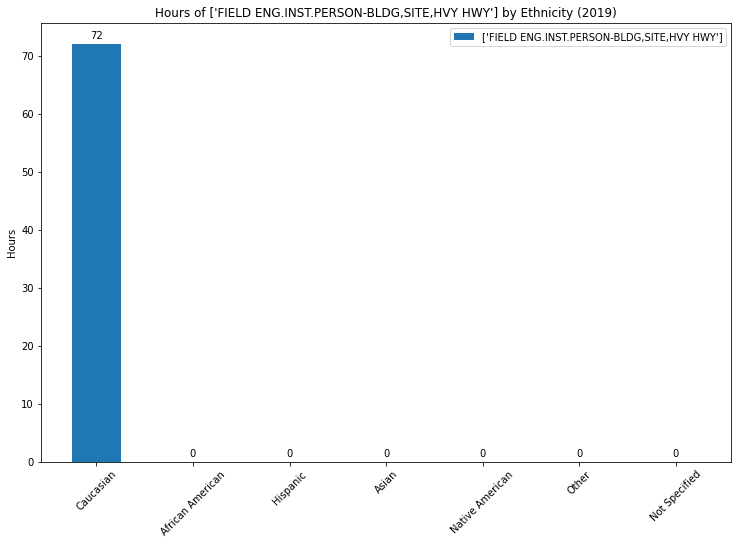

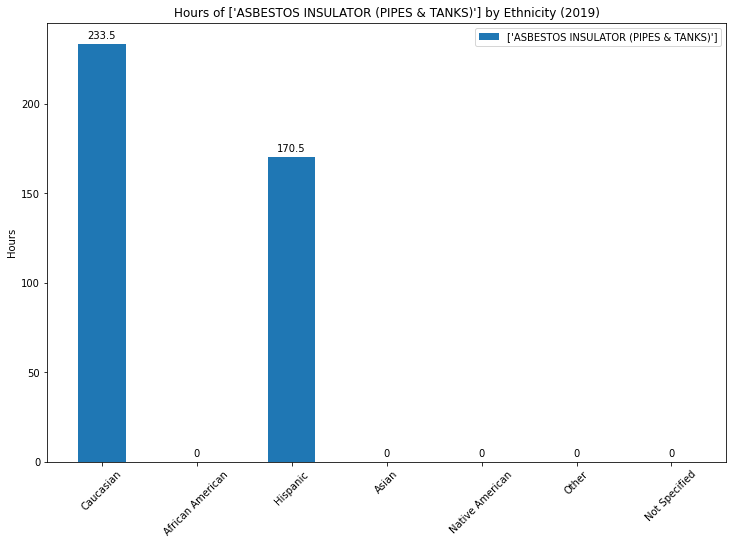

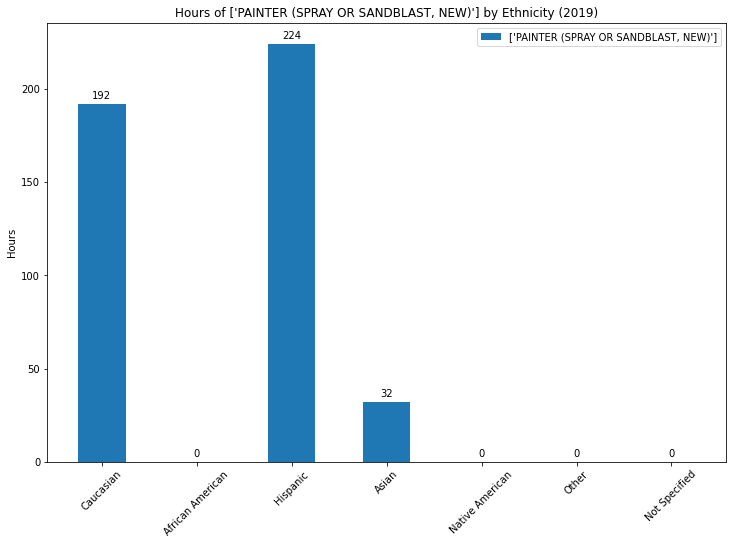

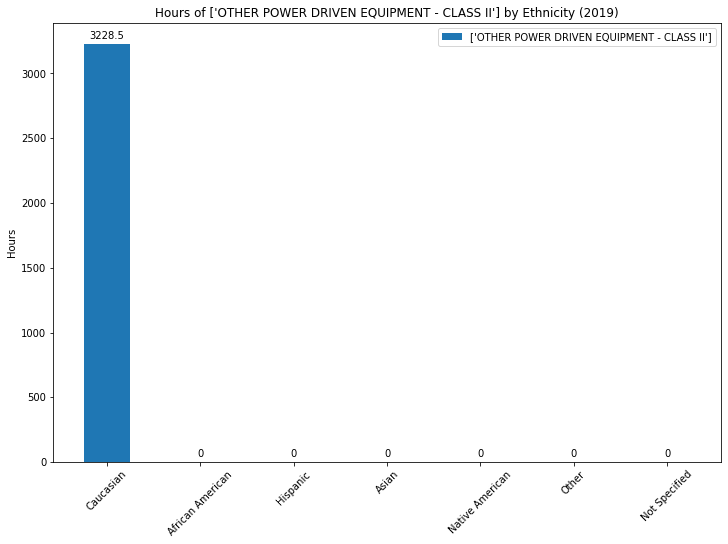

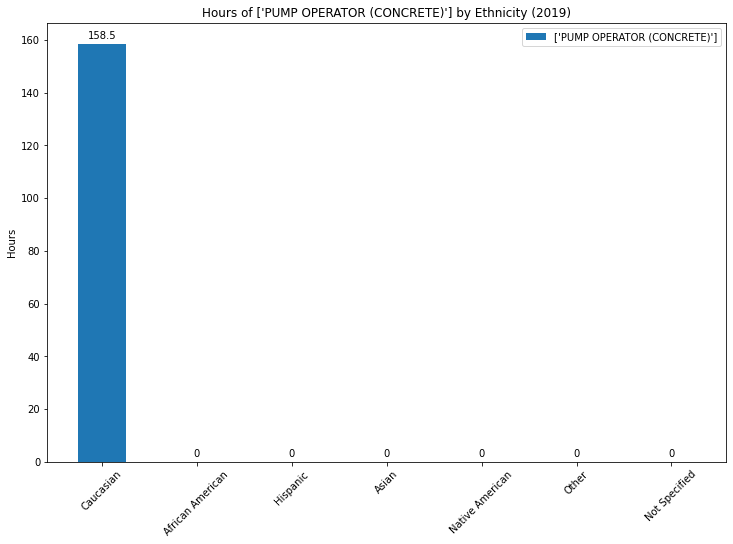

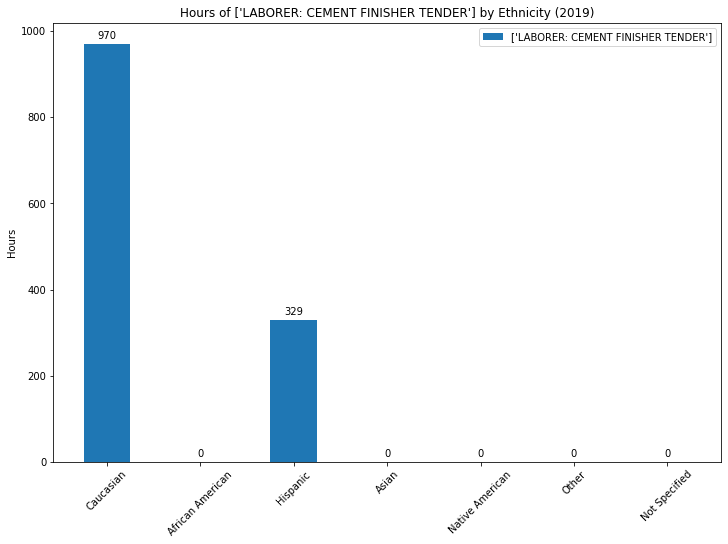

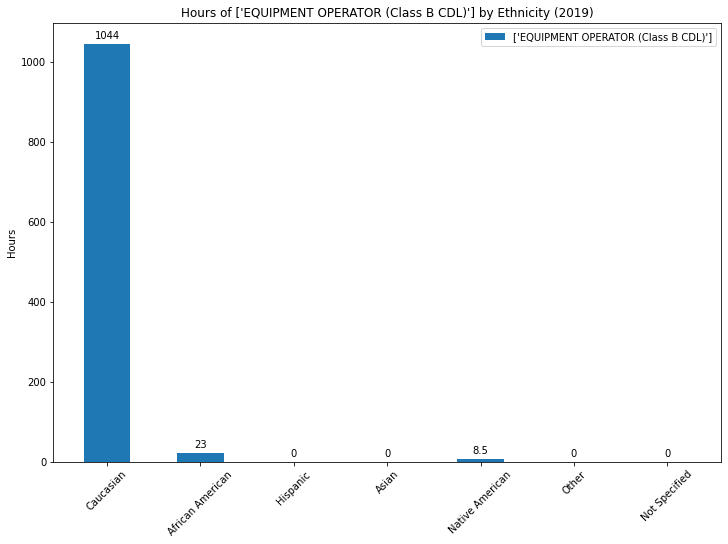

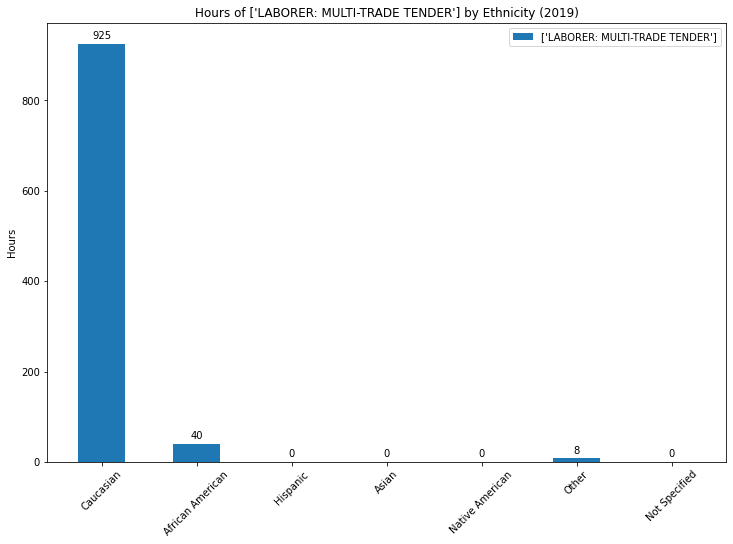

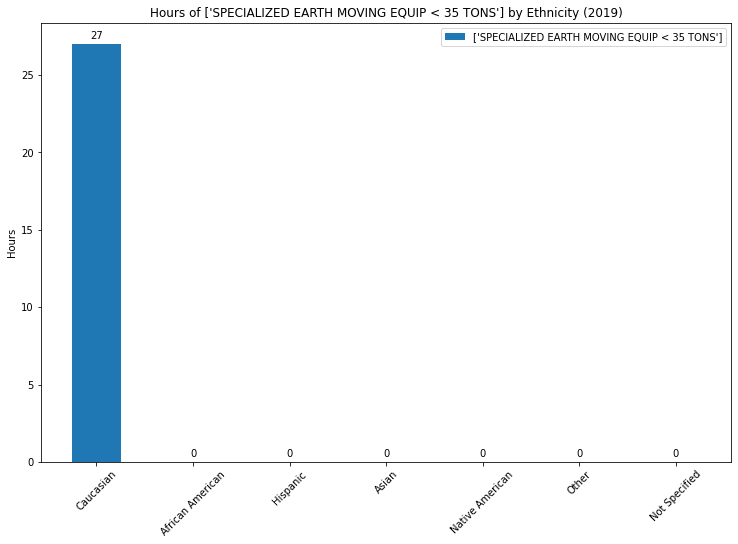

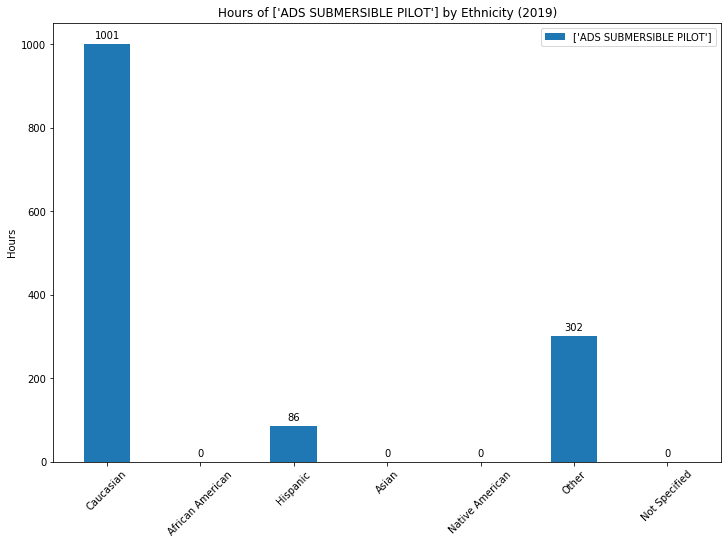

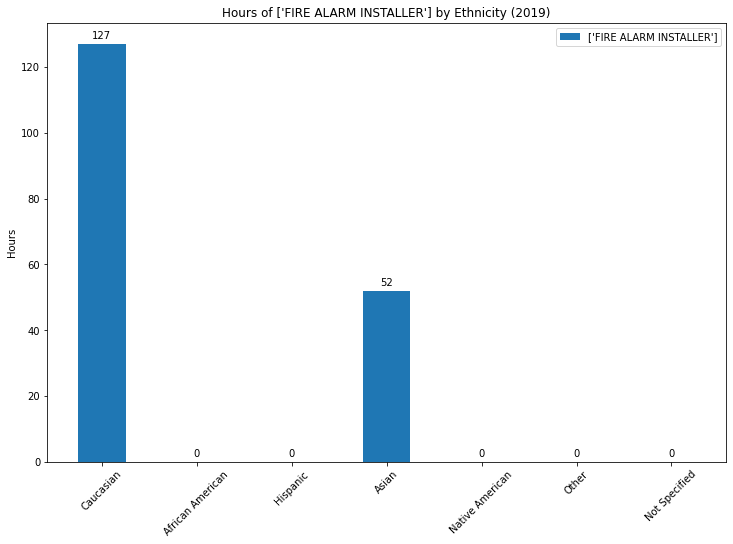

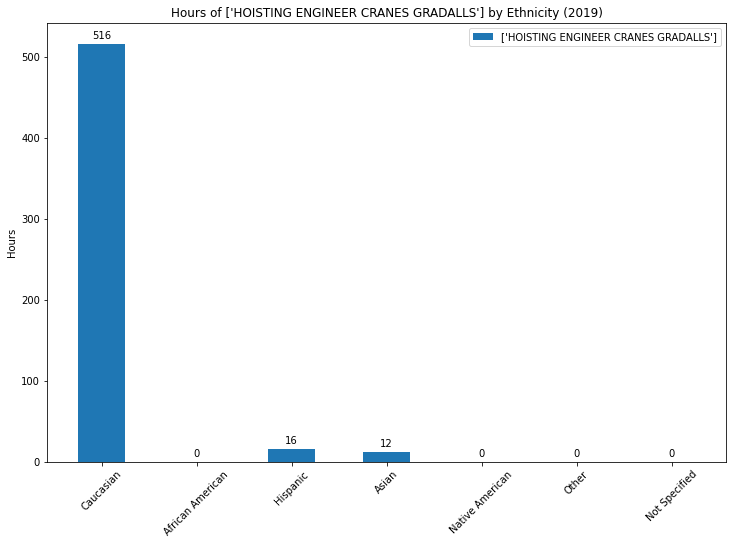

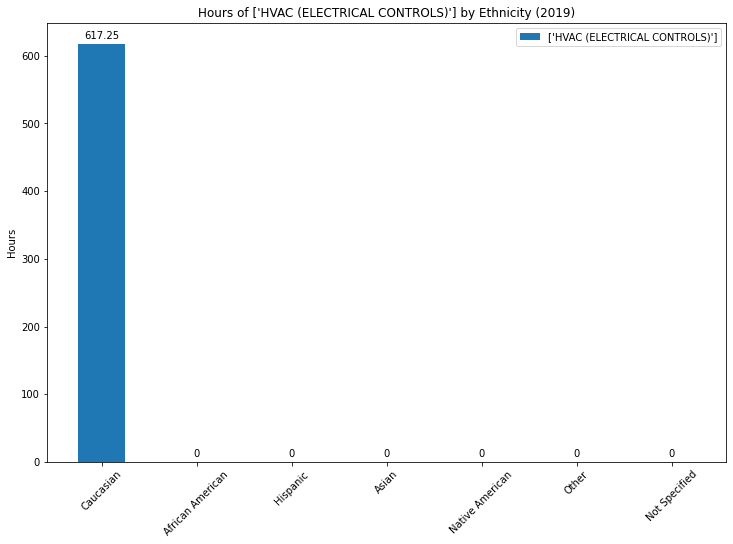

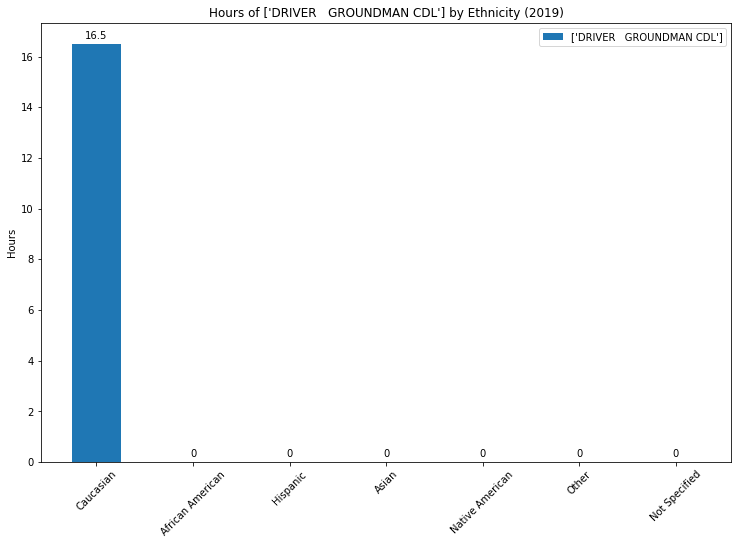

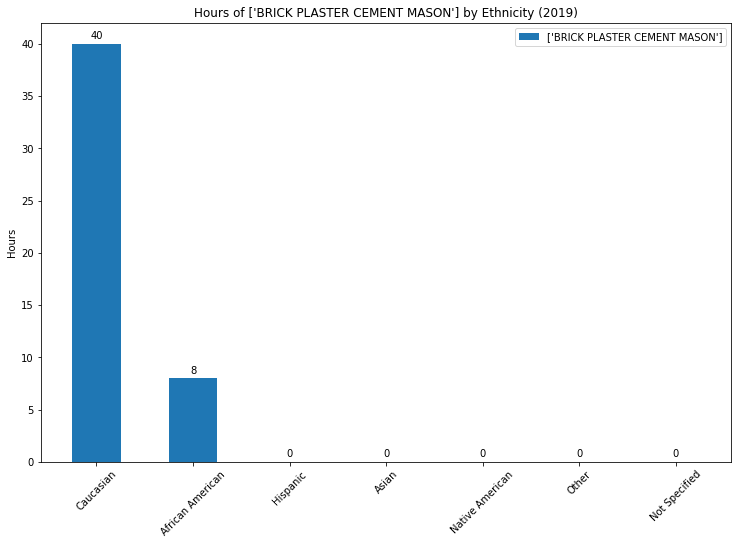

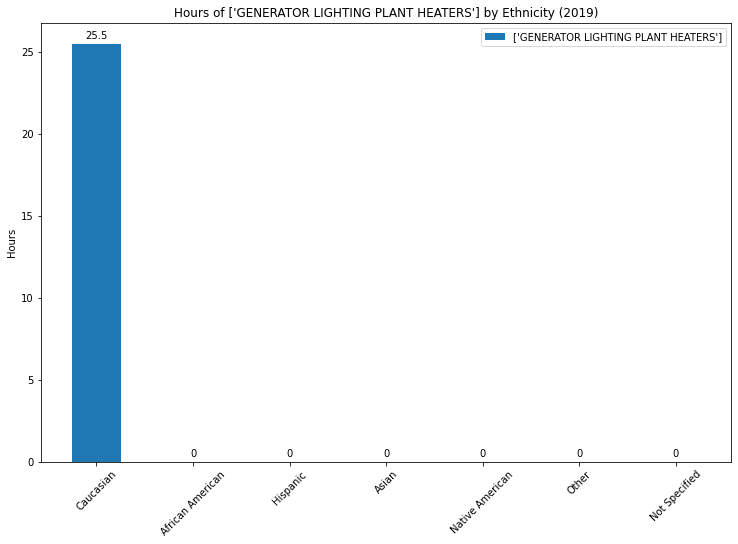

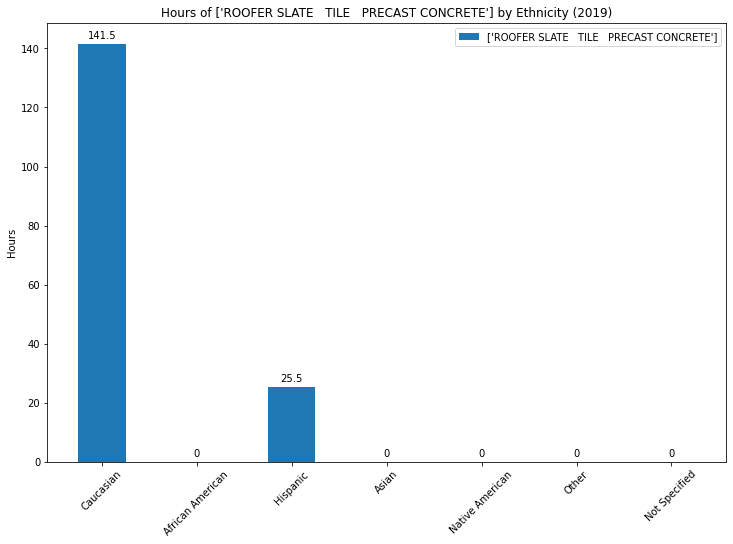

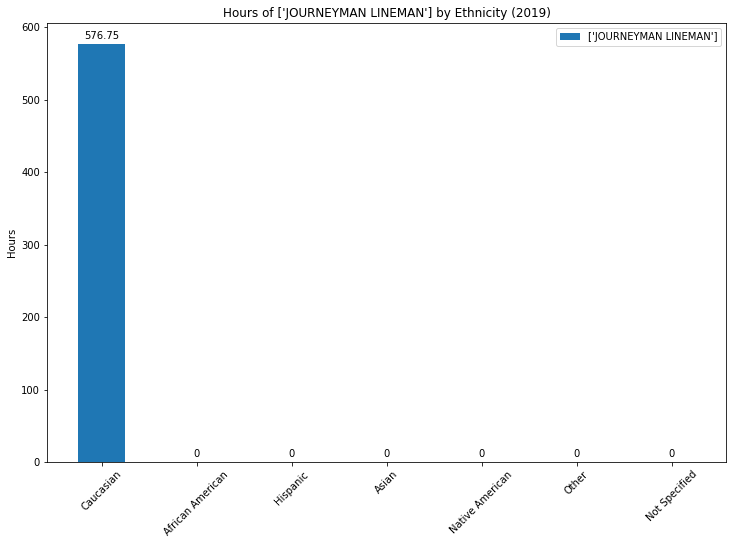

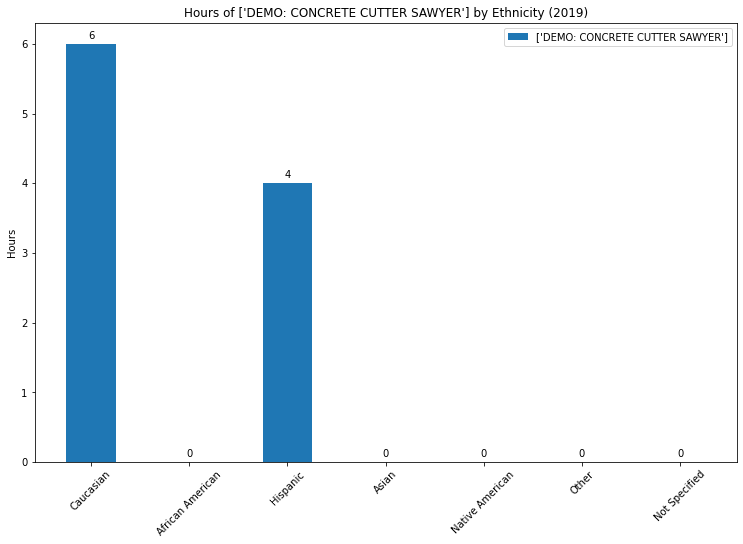

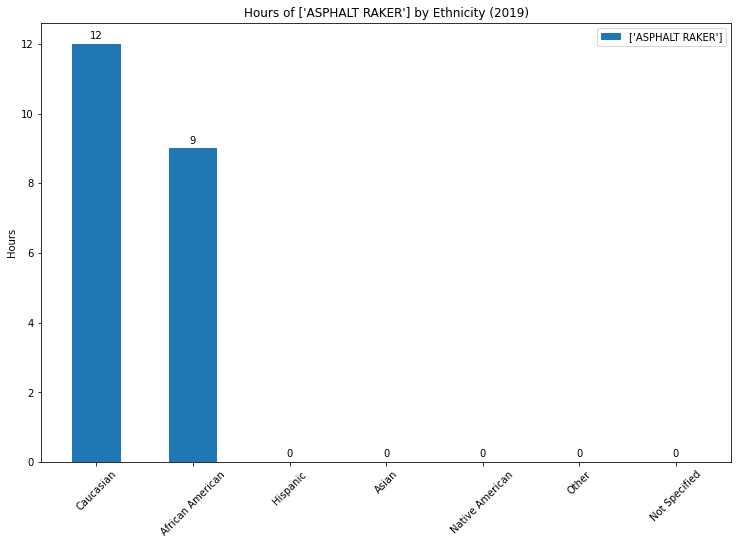

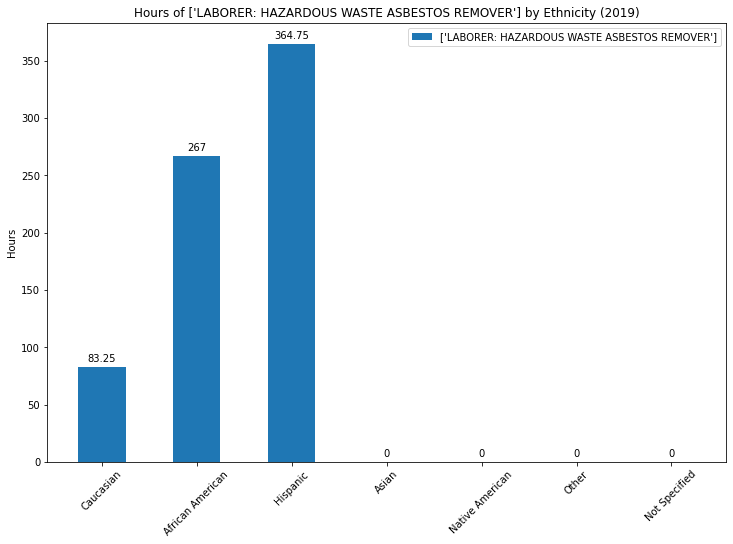

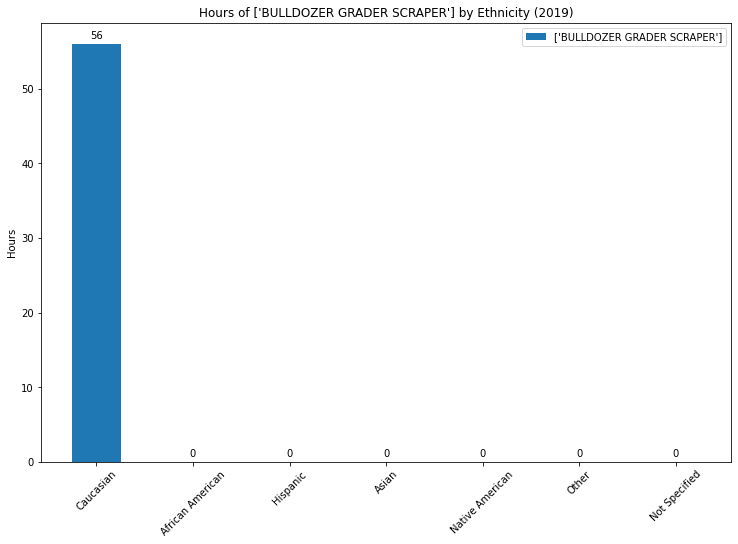

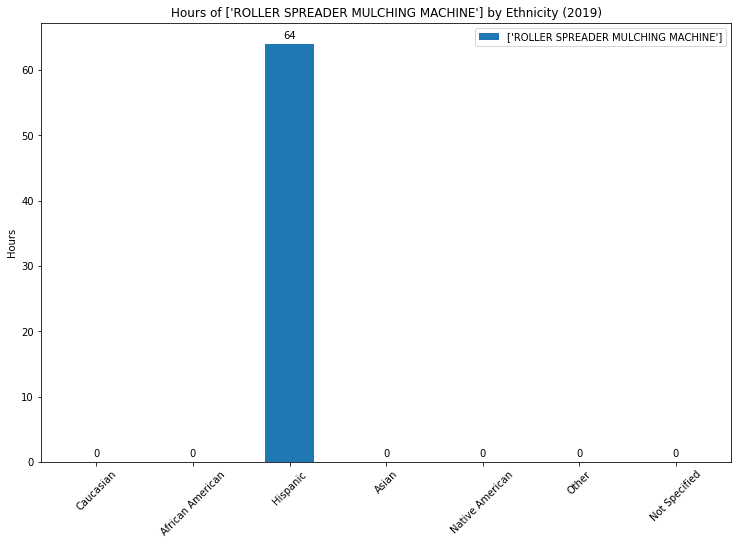

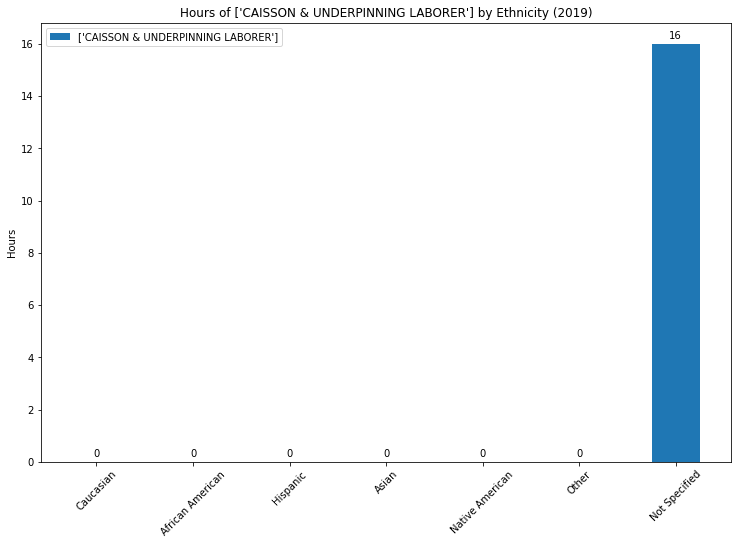

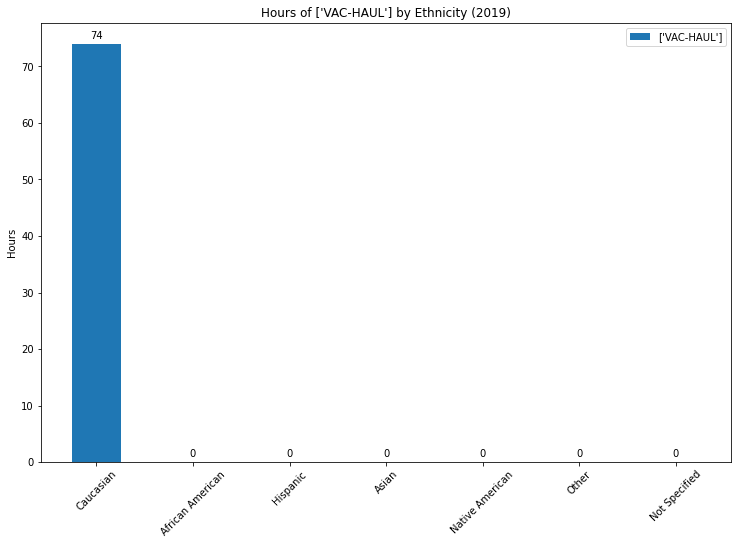

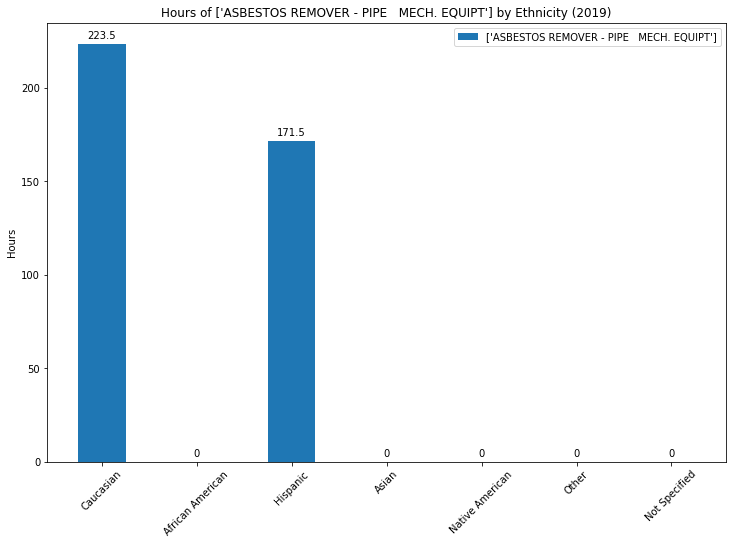

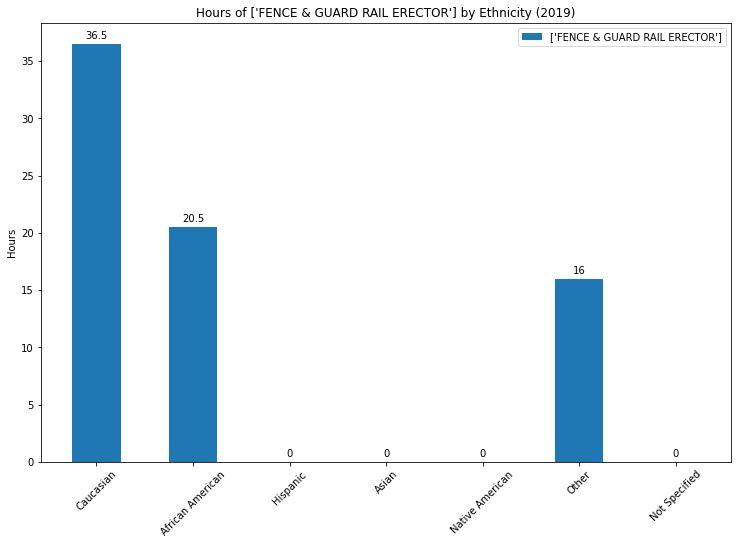

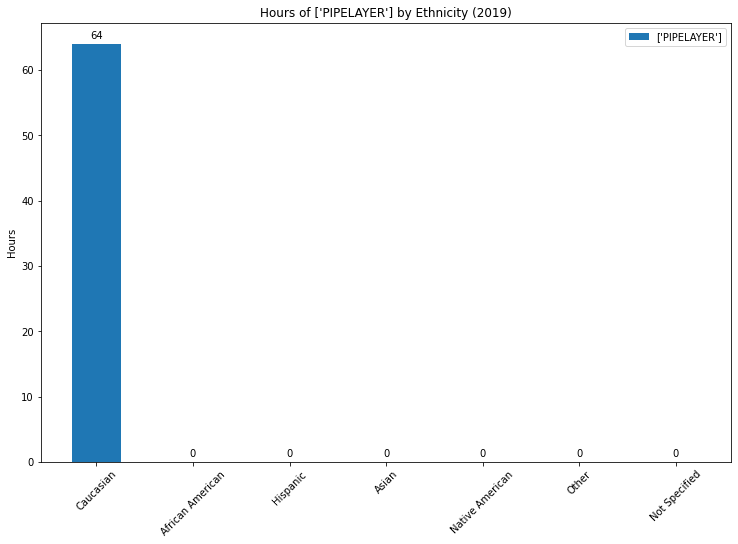

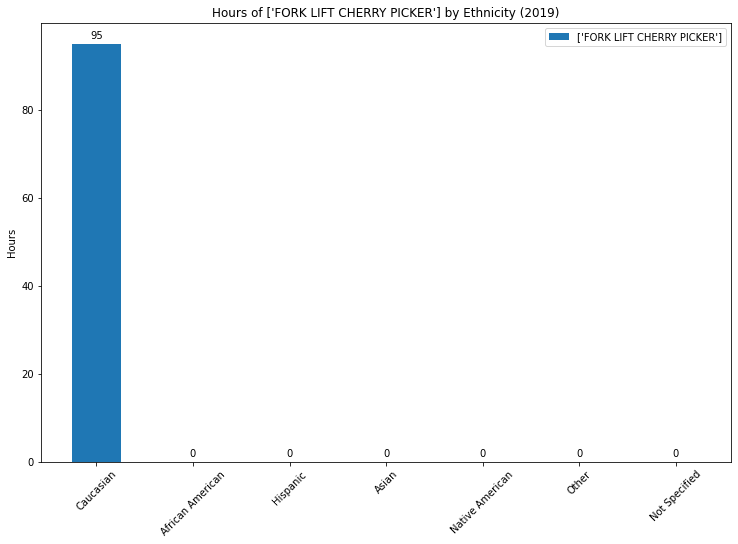

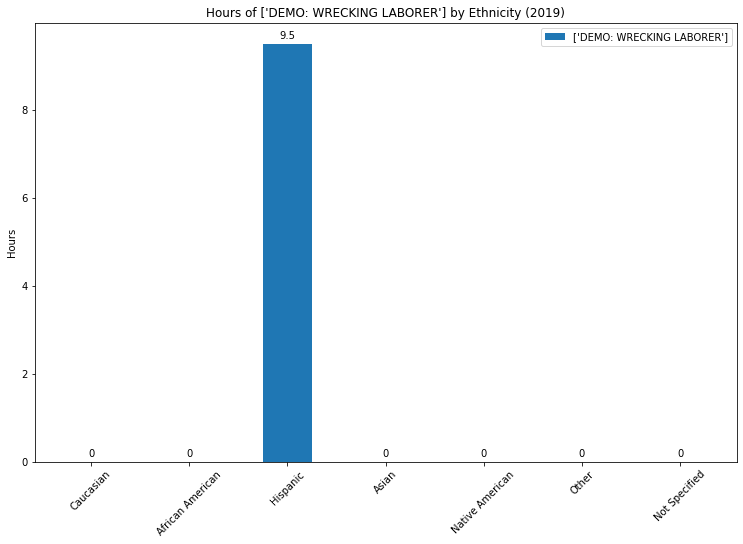

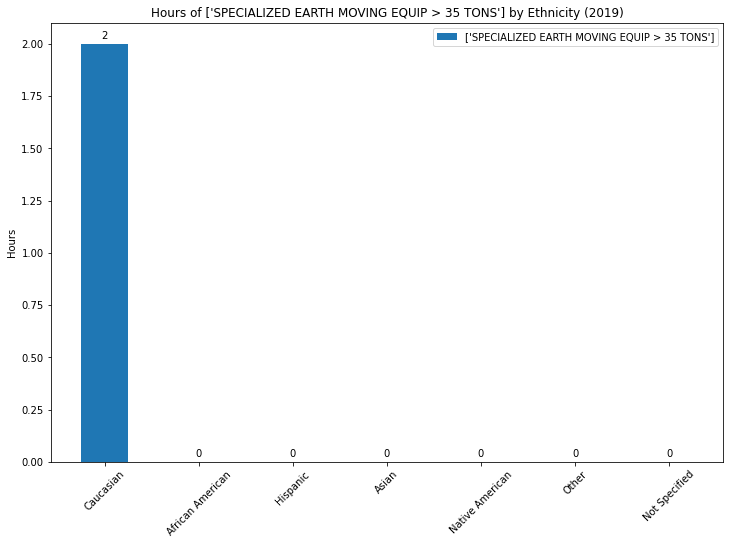

In [238]:
graph_trade_ethnic_2019(trade_hours_2019, trade_2019)

<ipython-input-239-7068c60e6819>:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax= plt.subplots()


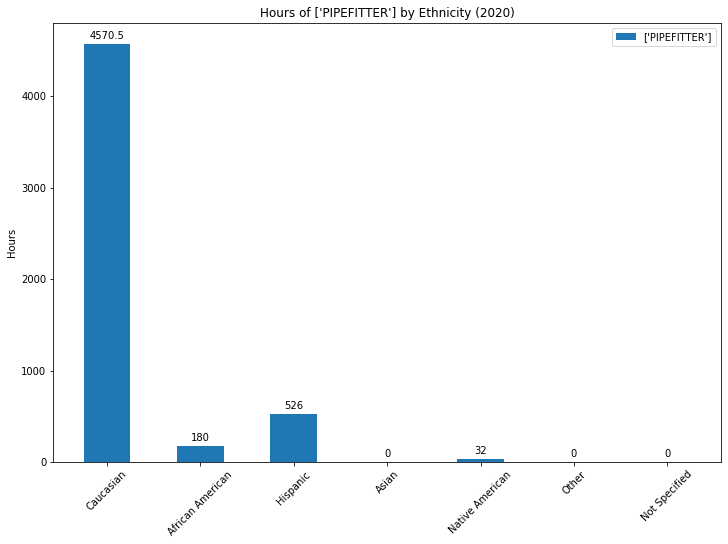

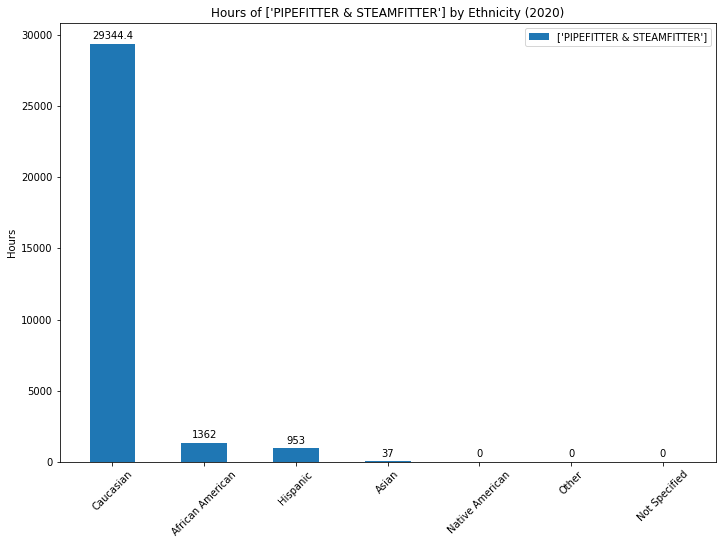

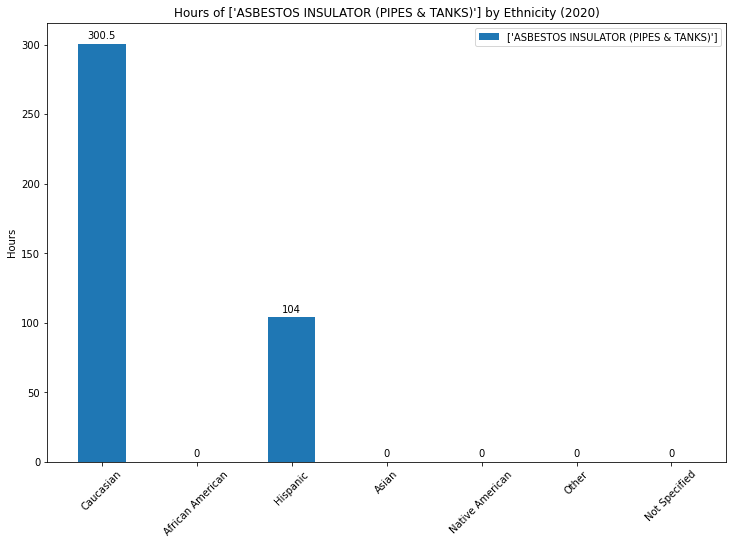

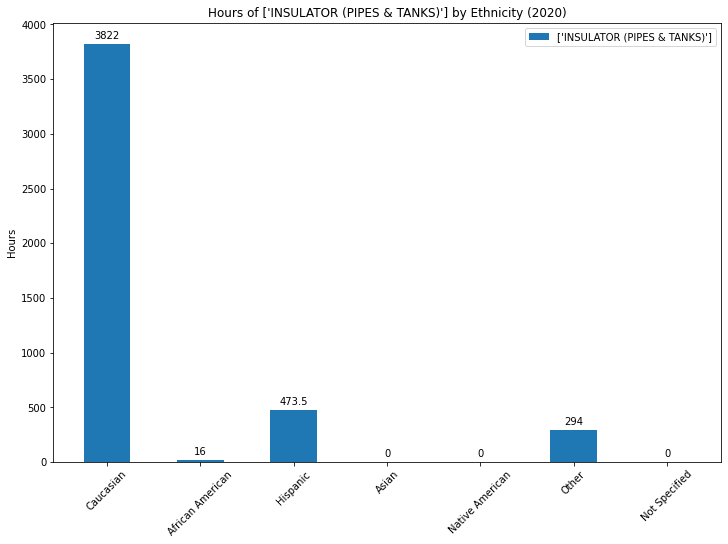

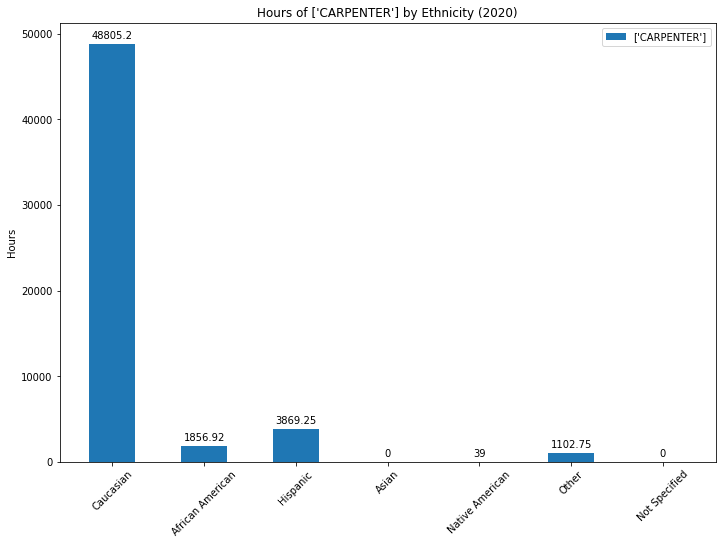

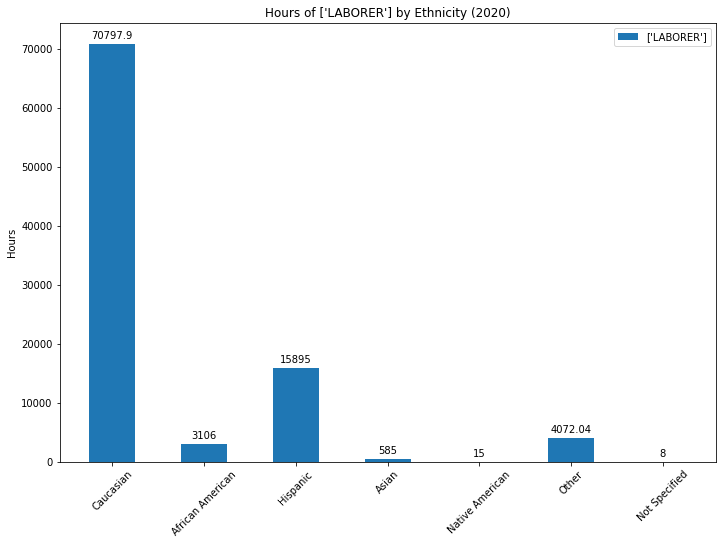

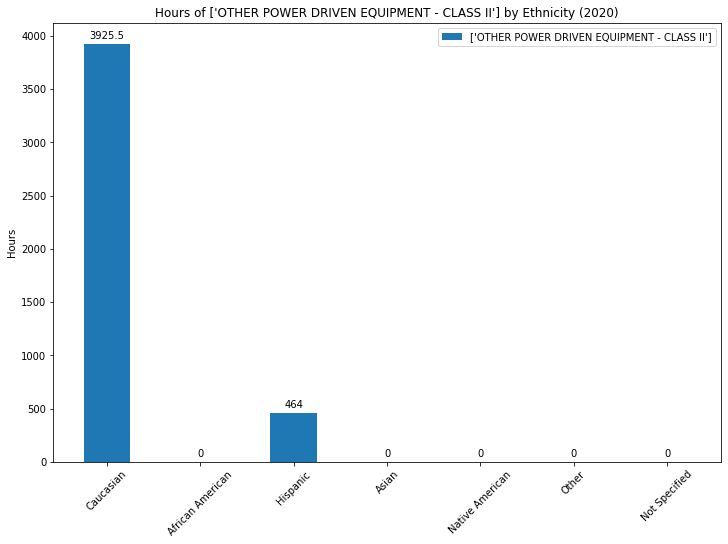

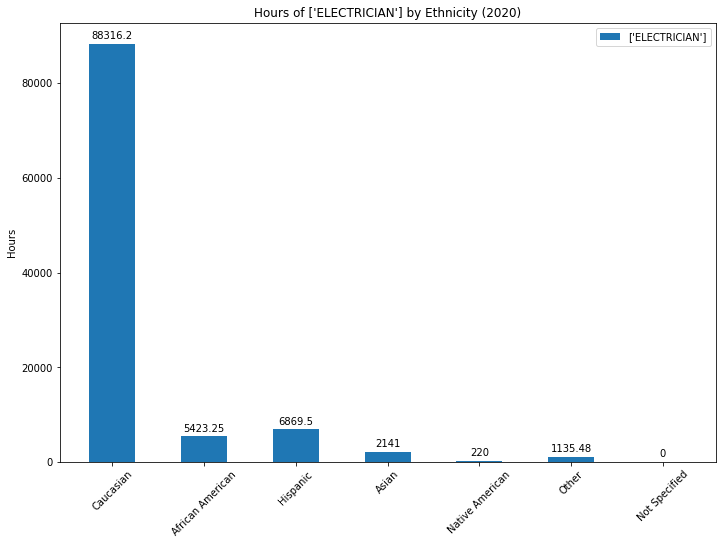

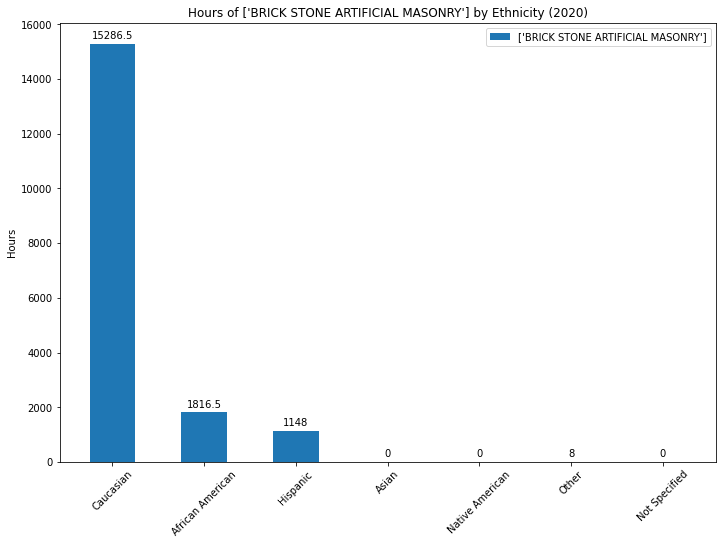

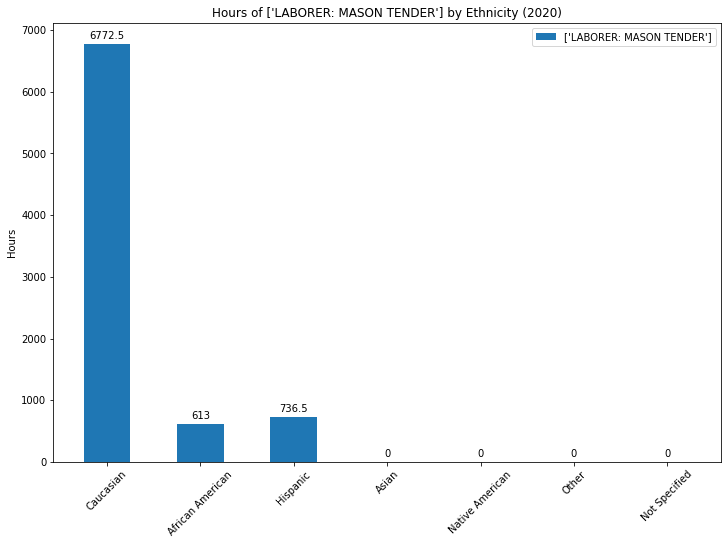

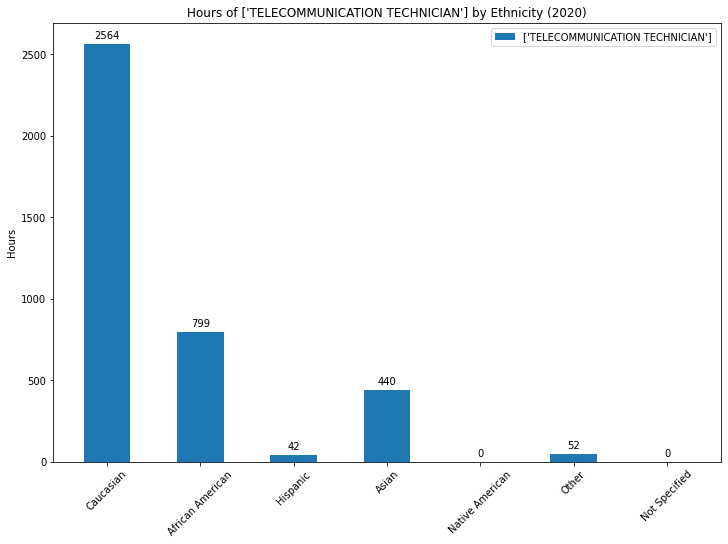

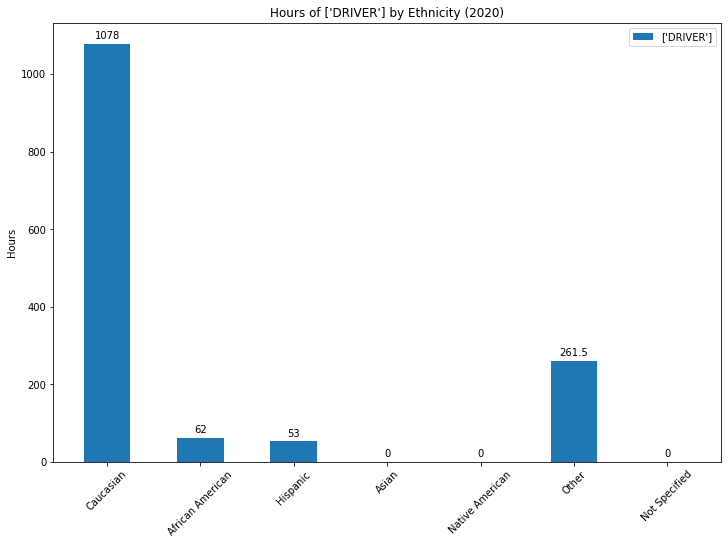

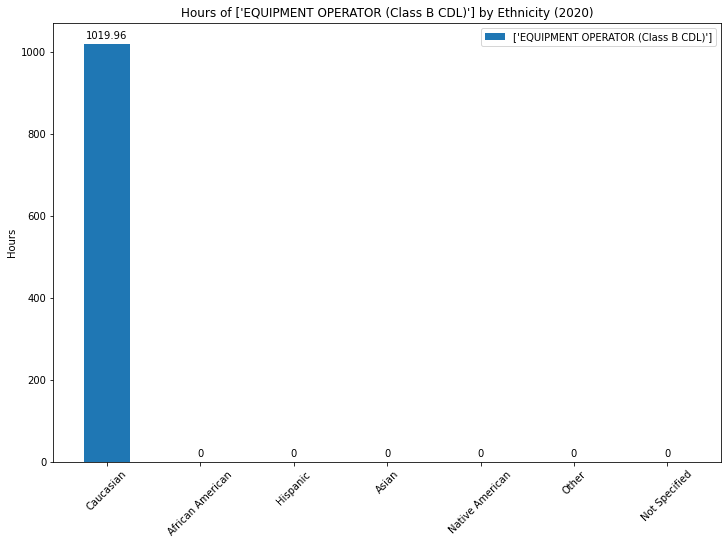

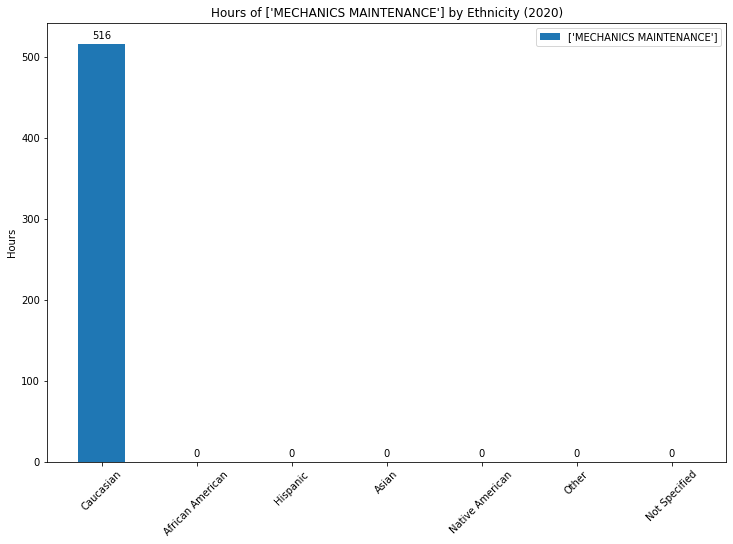

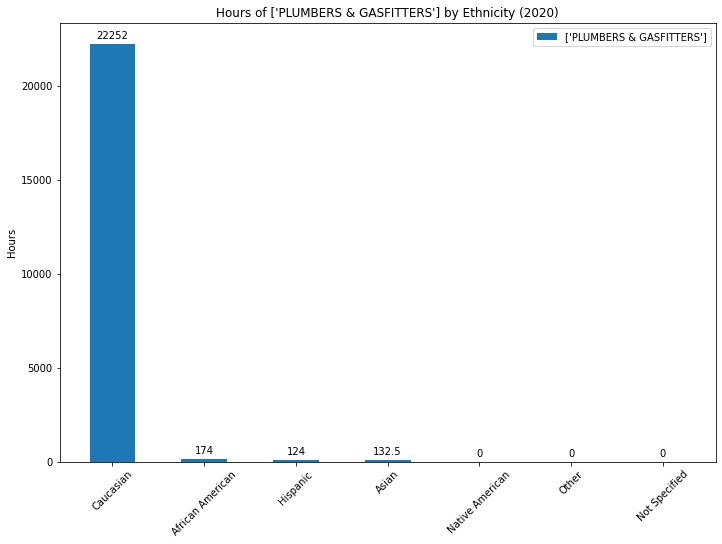

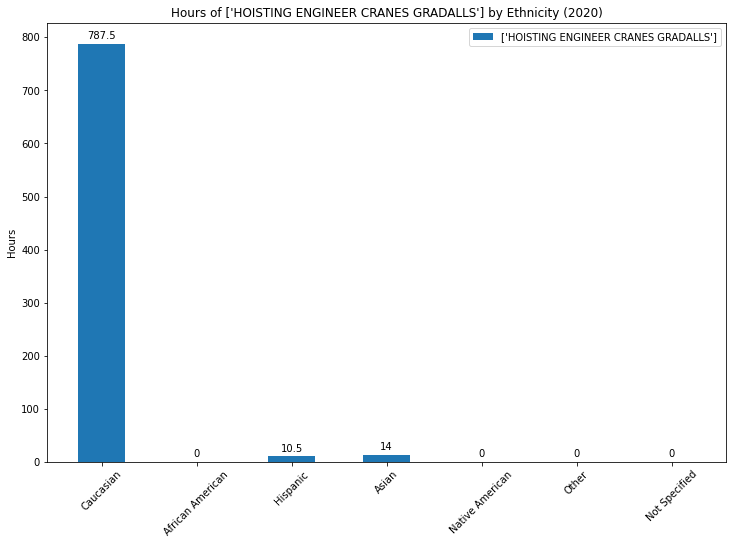

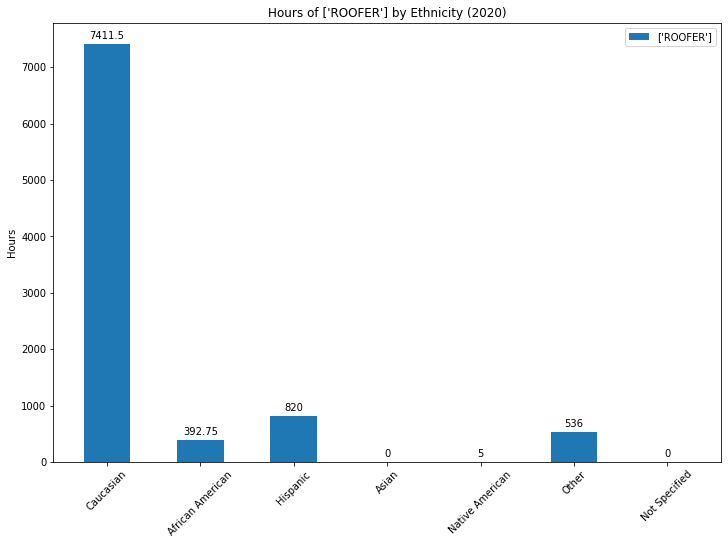

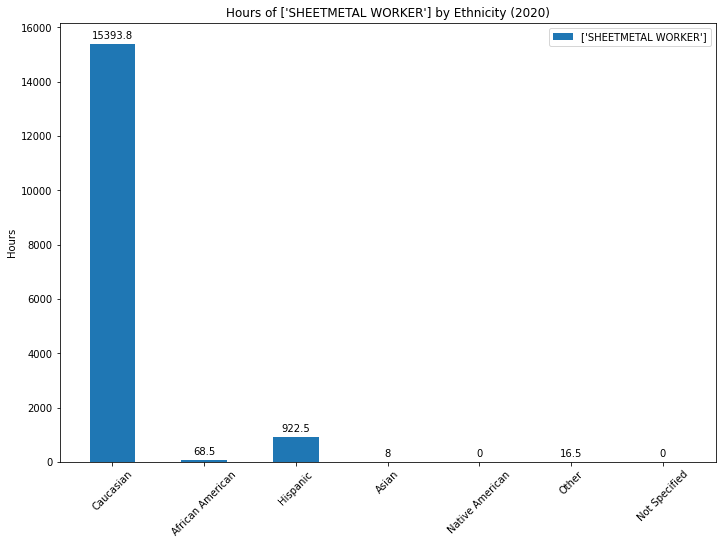

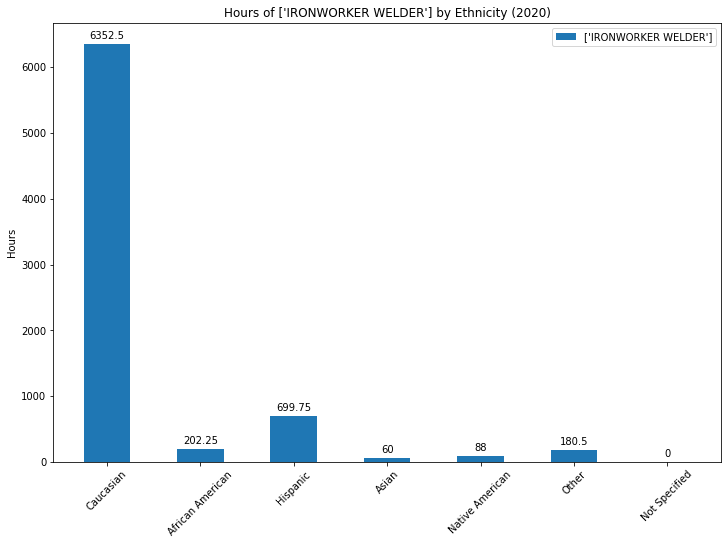

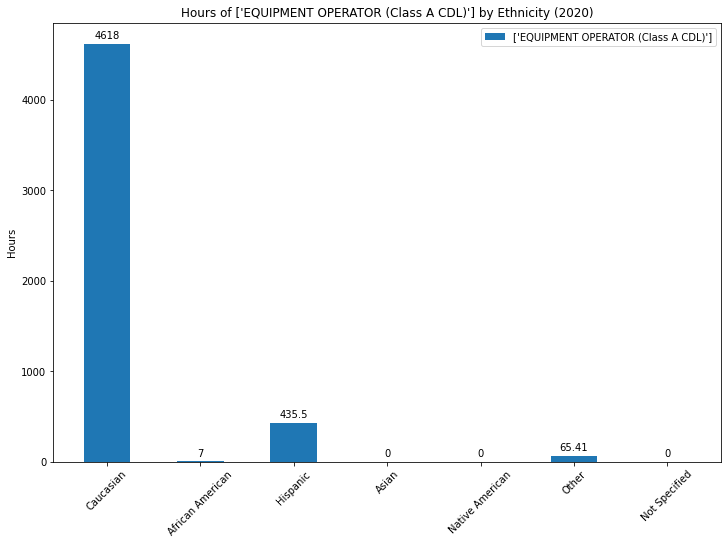

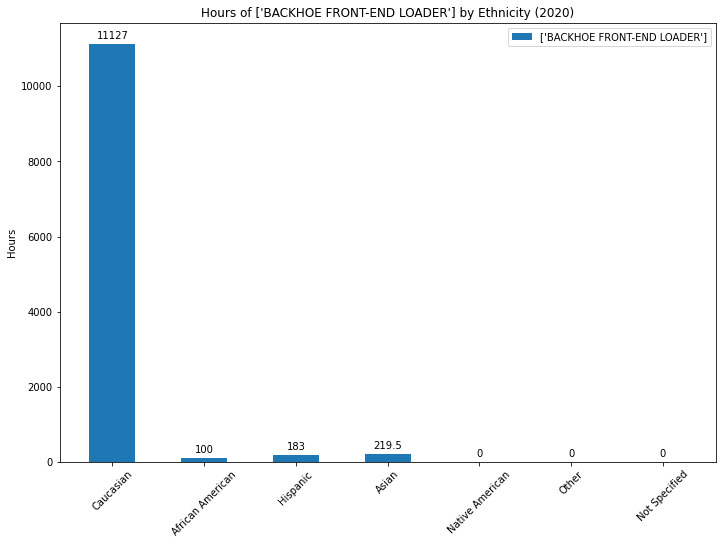

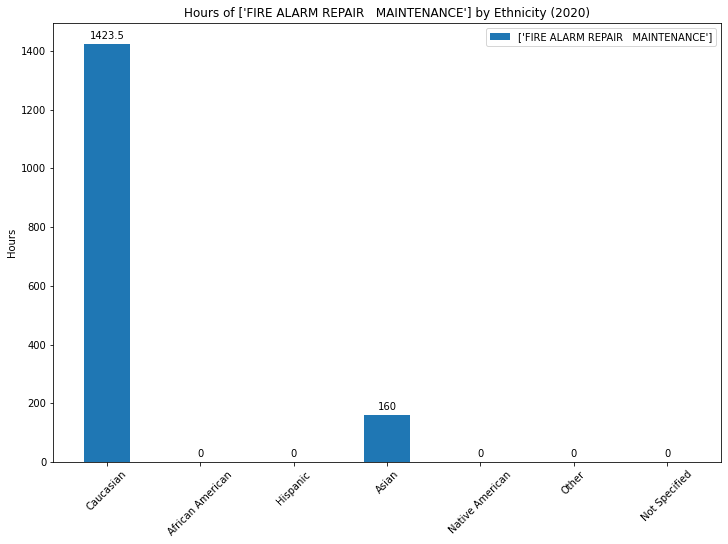

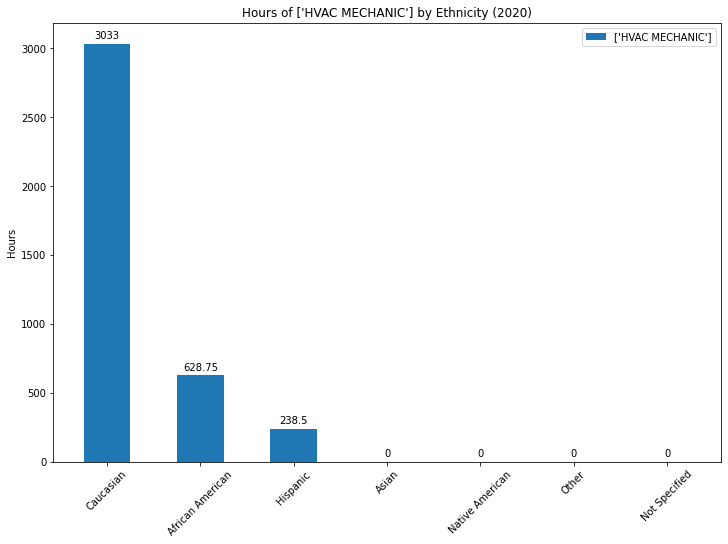

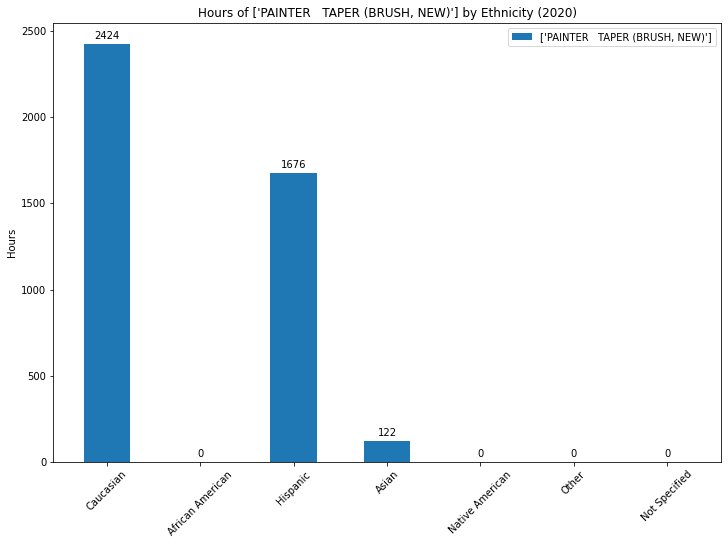

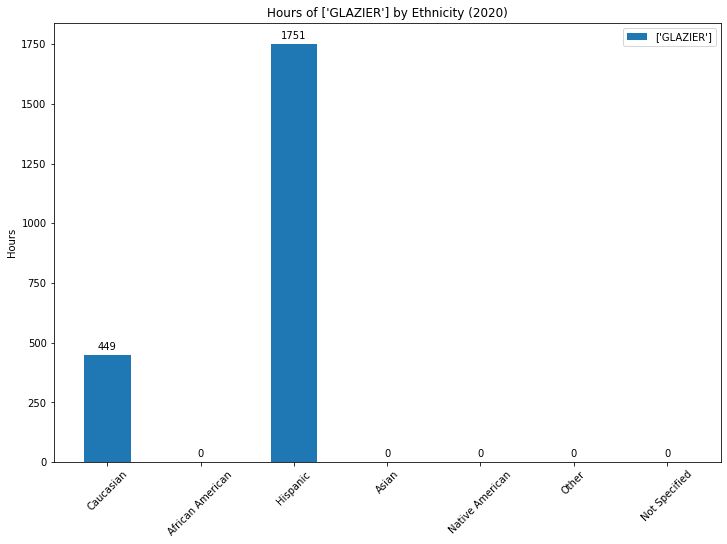

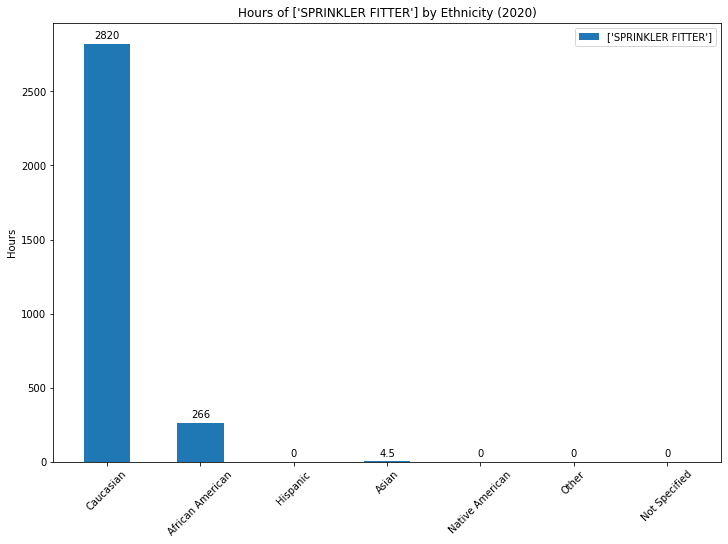

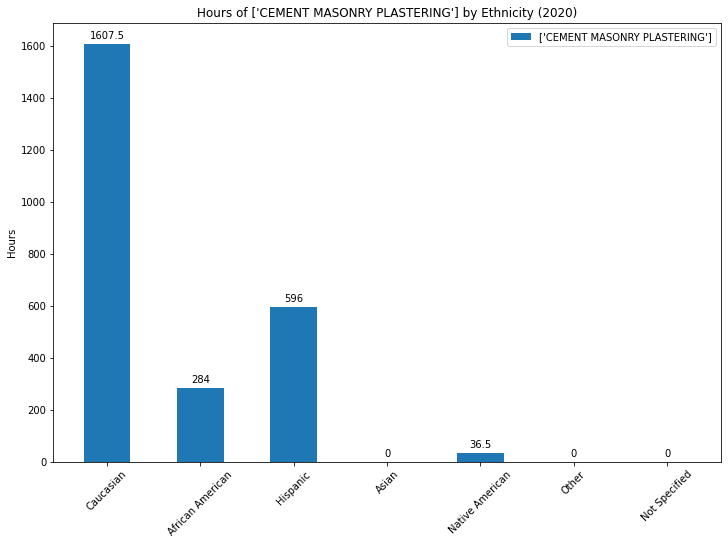

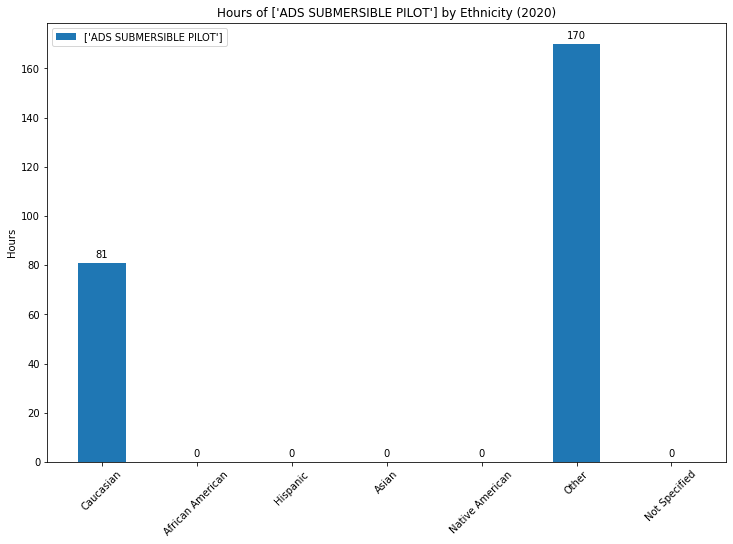

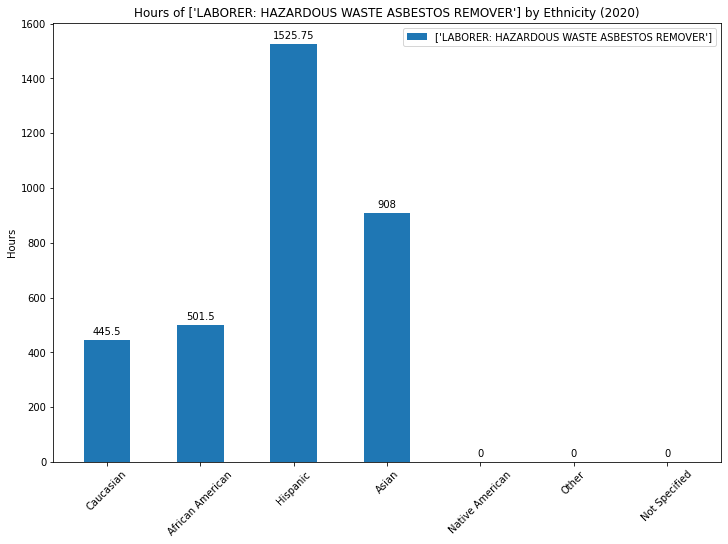

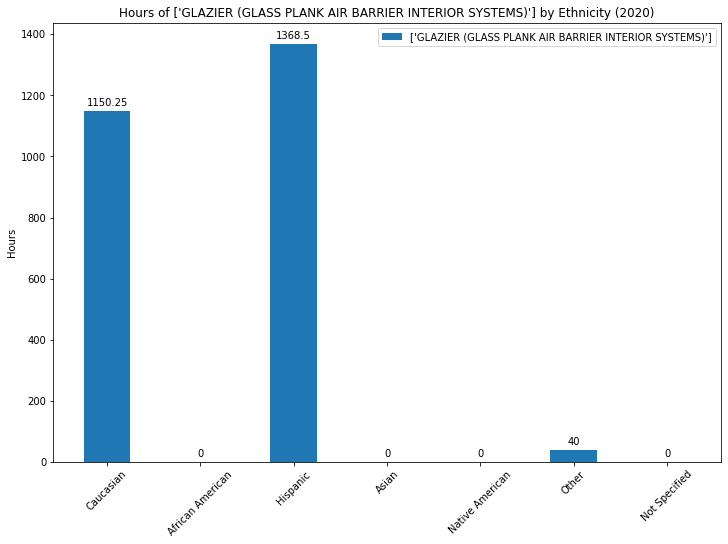

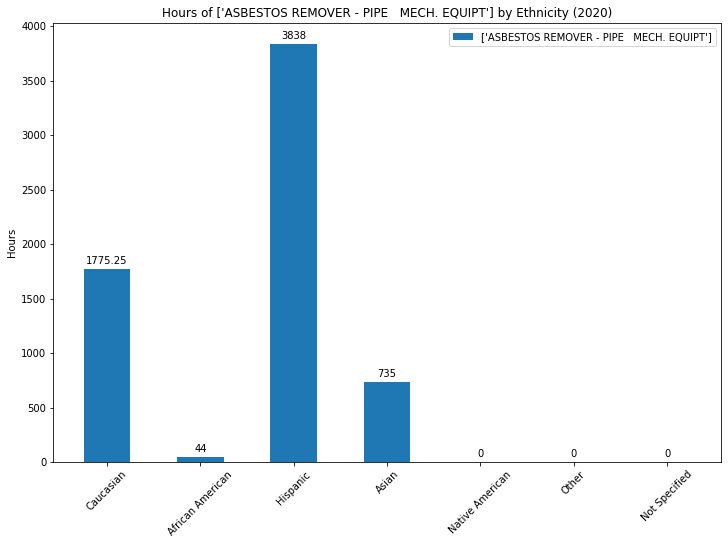

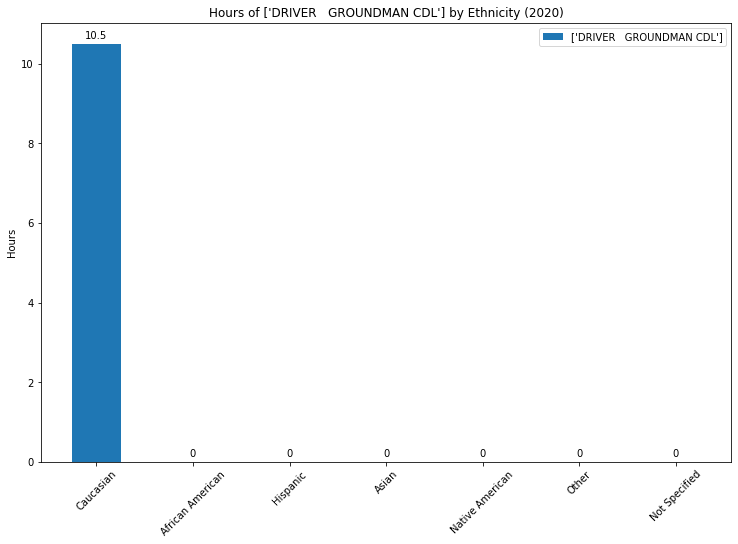

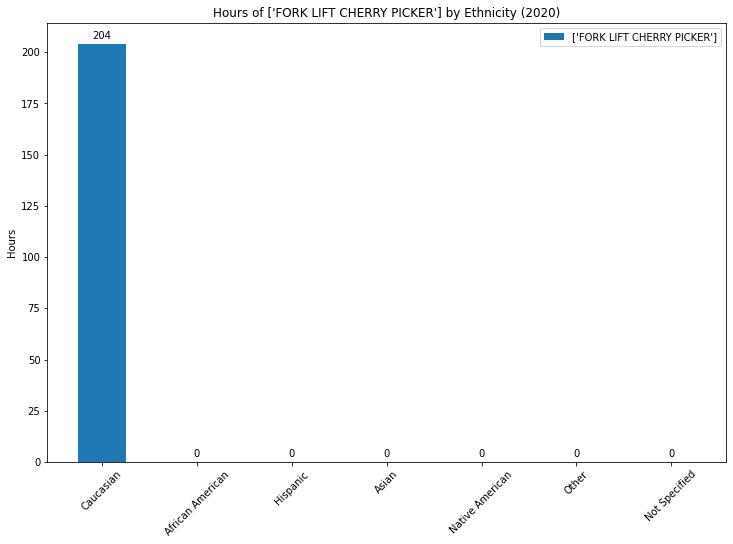

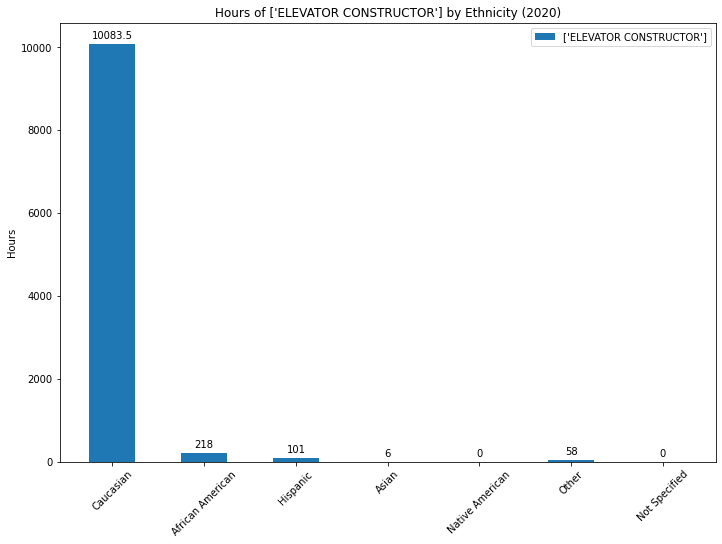

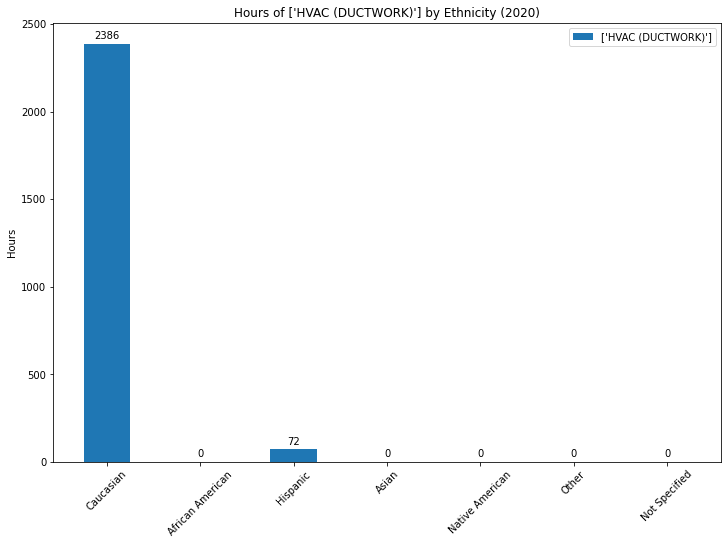

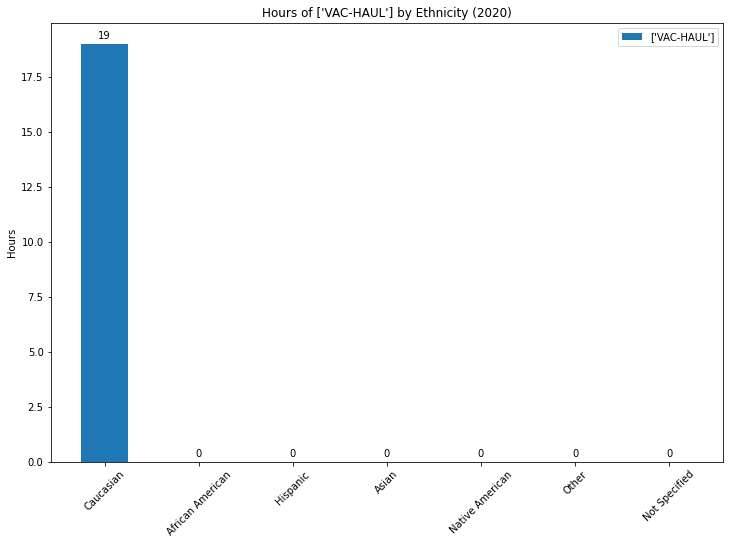

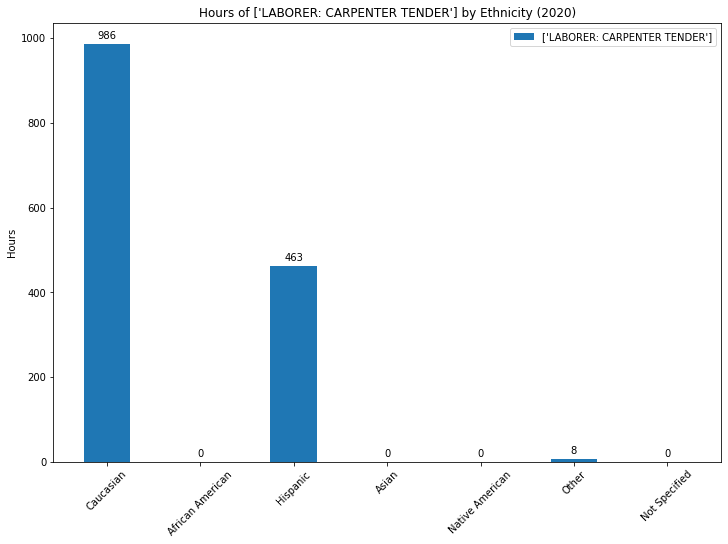

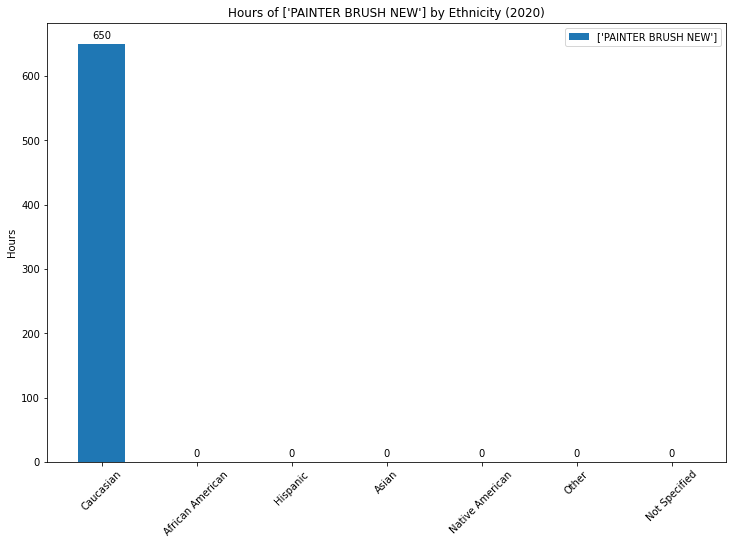

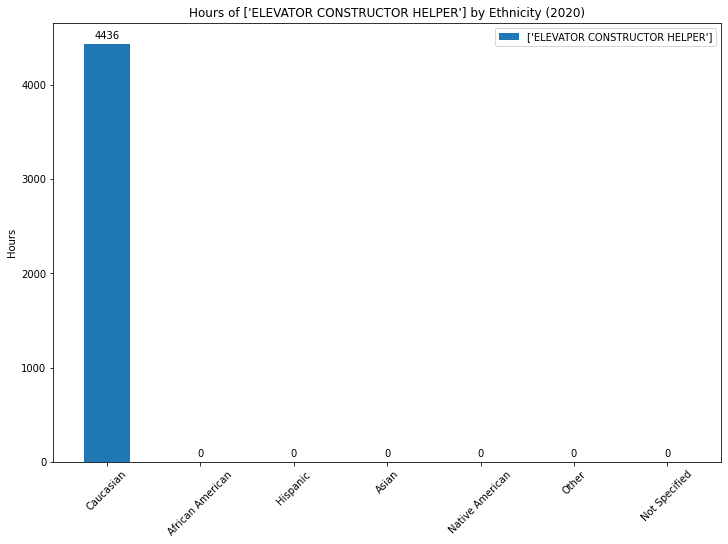

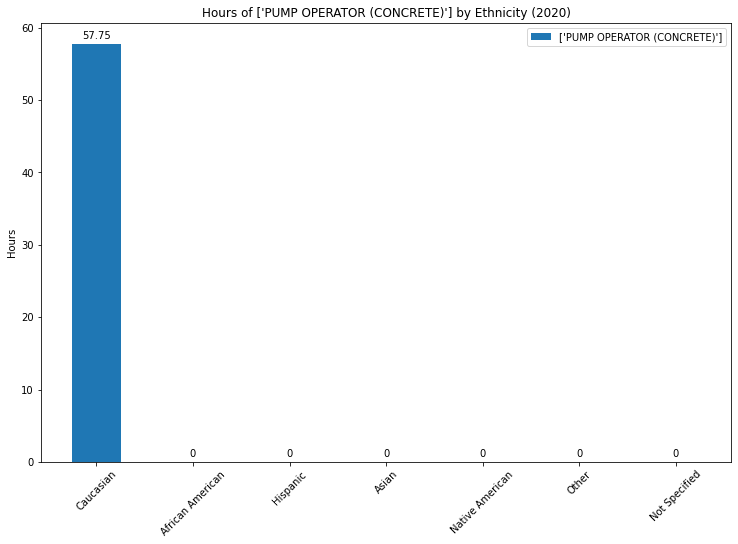

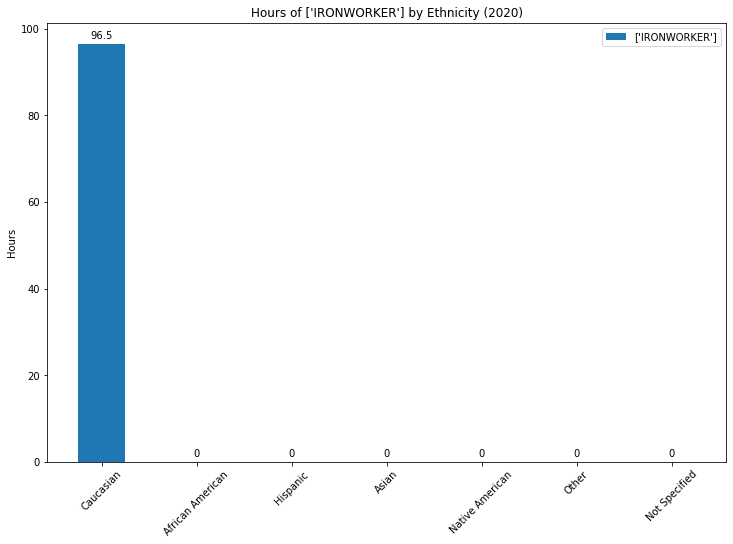

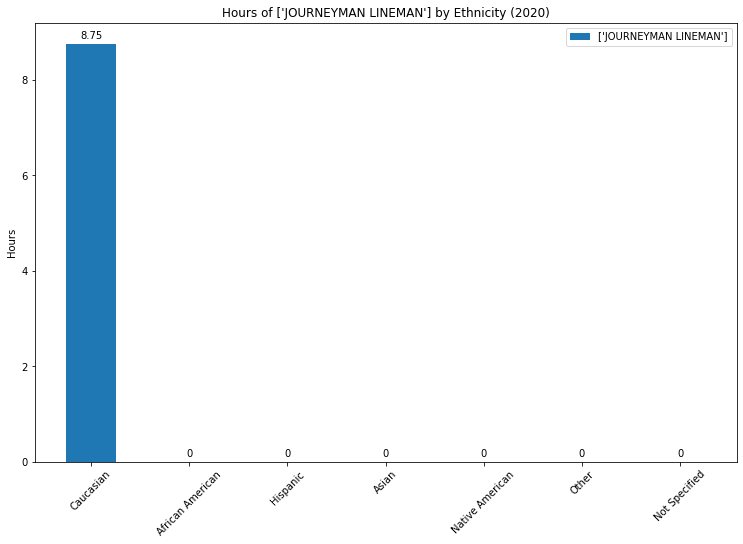

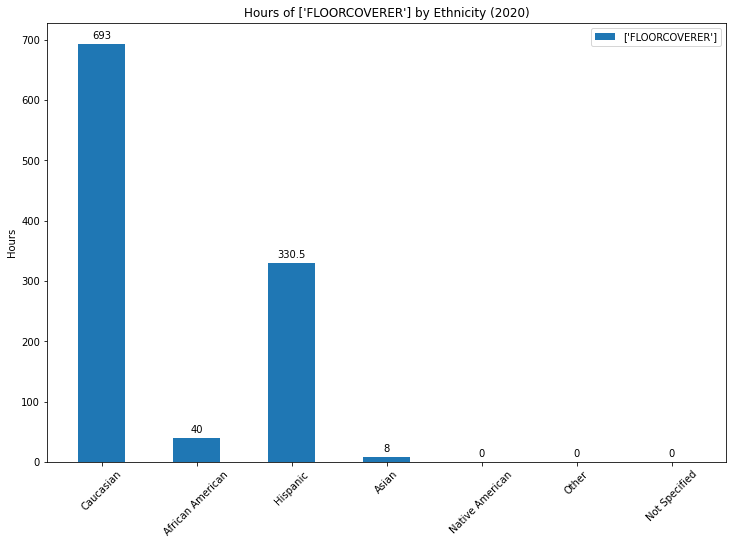

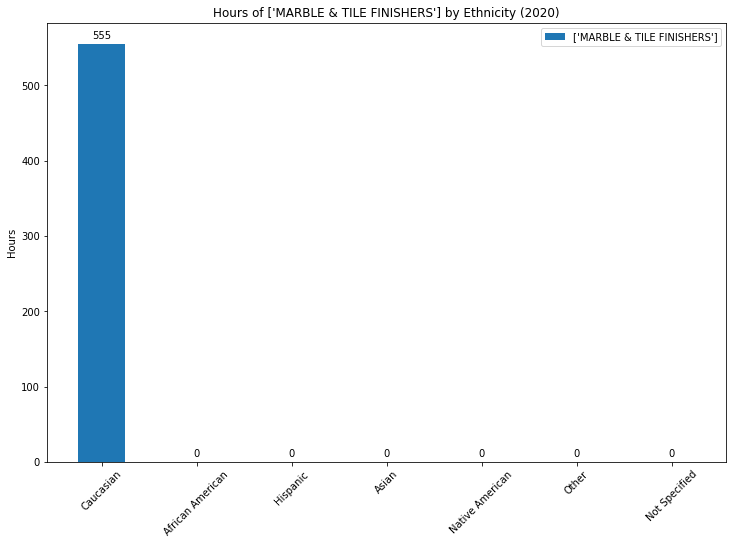

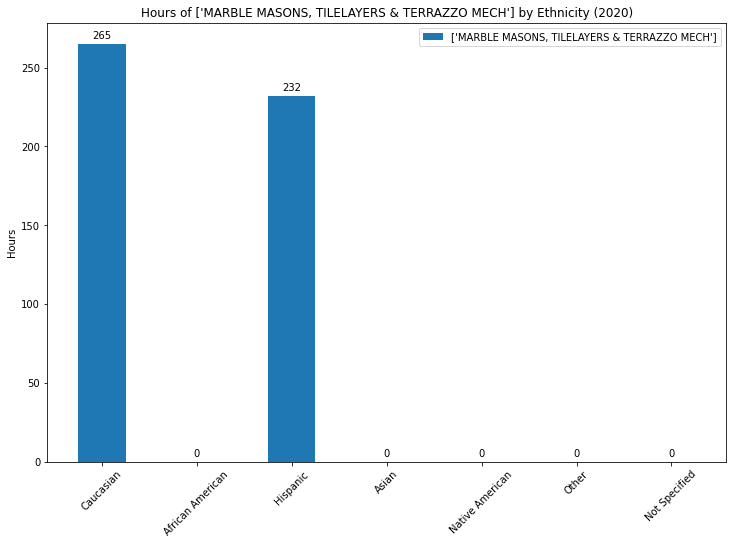

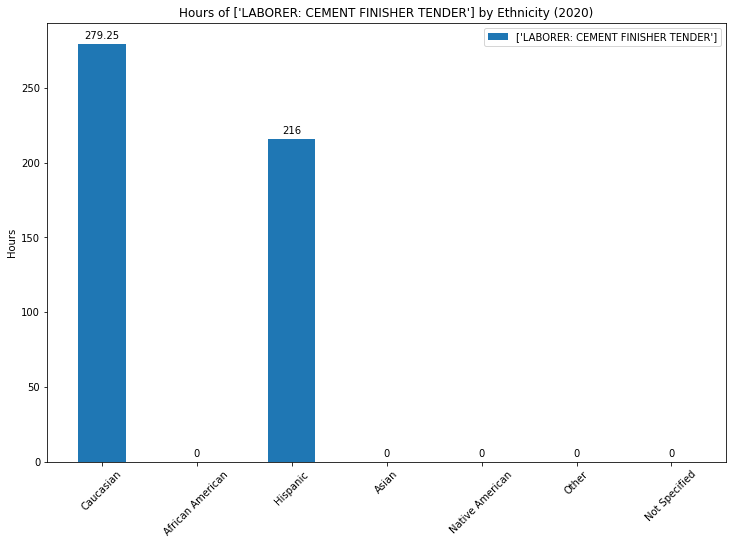

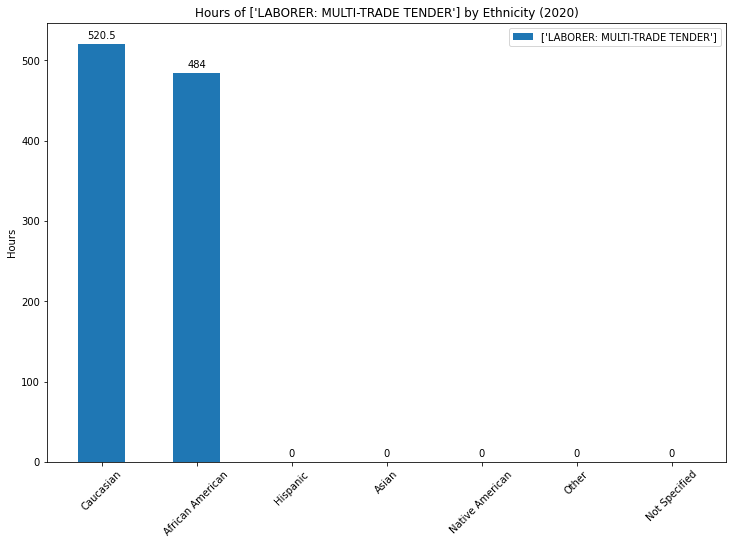

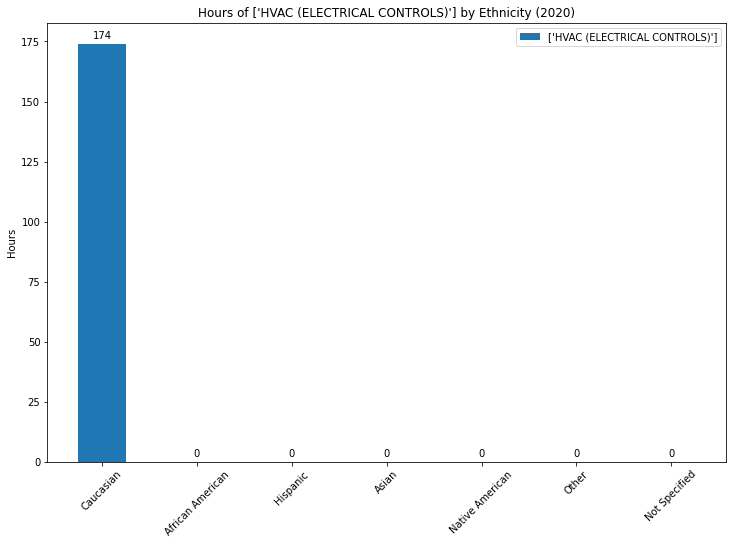

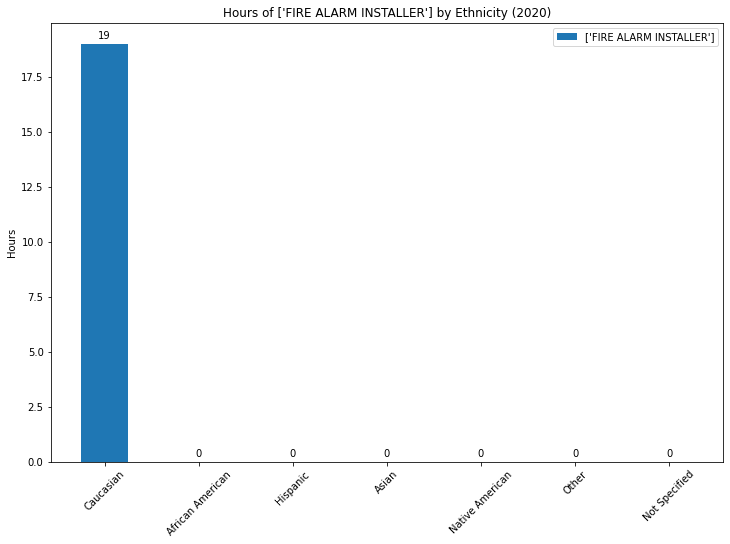

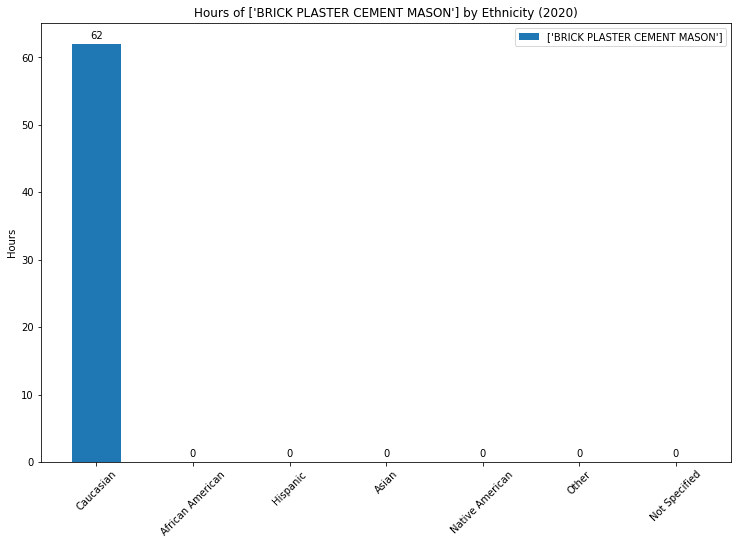

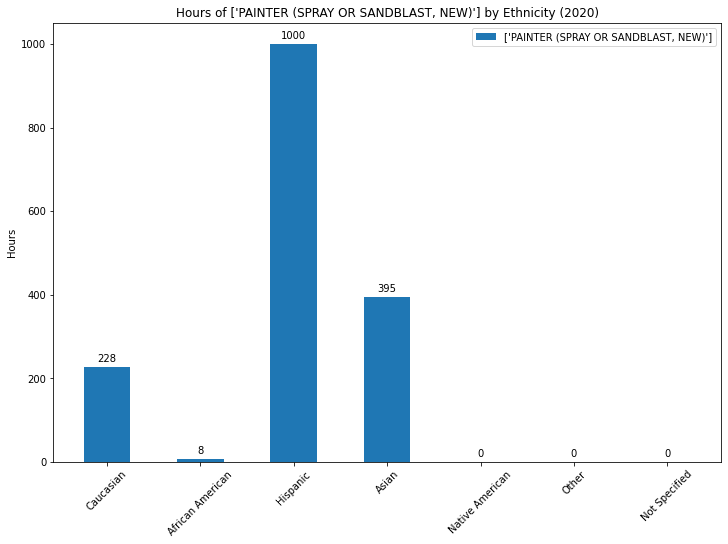

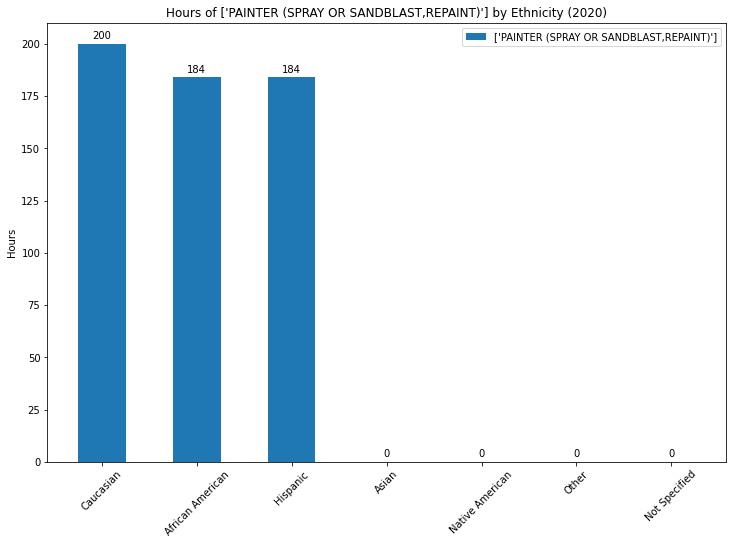

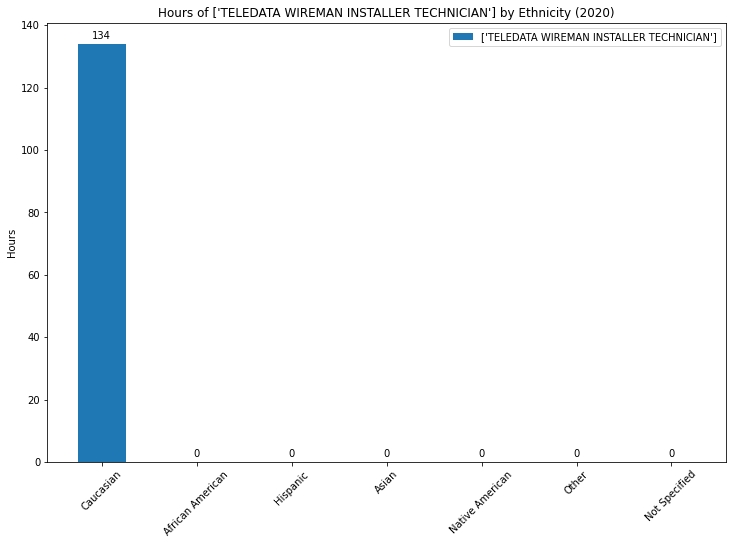

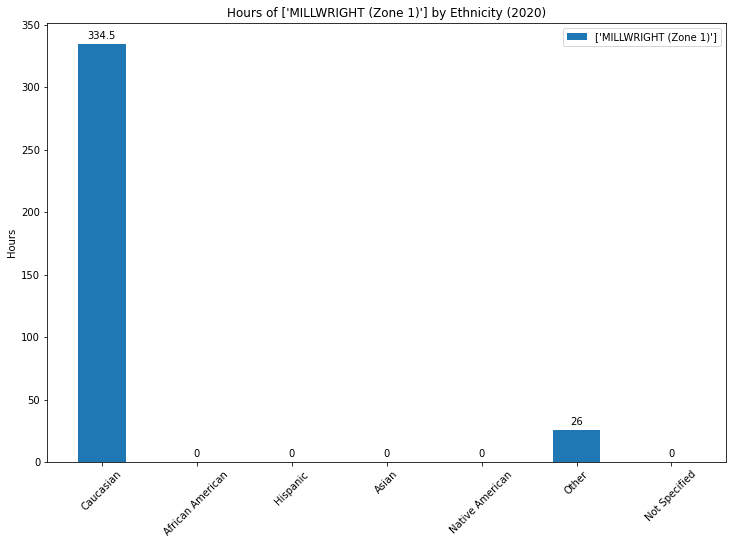

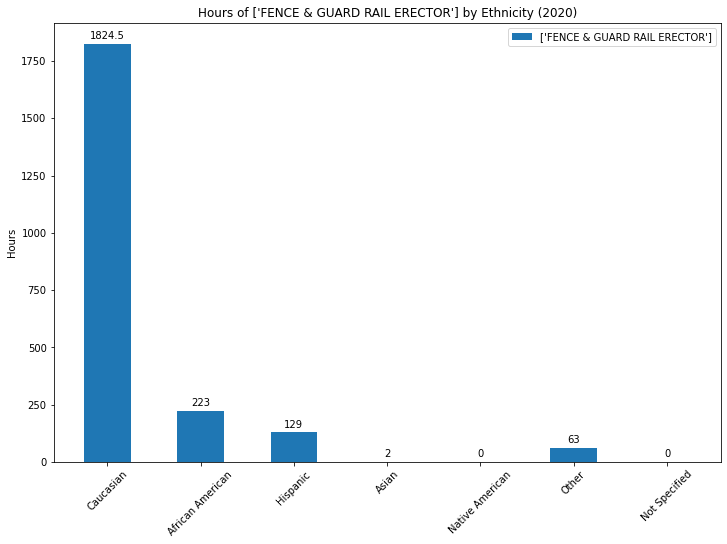

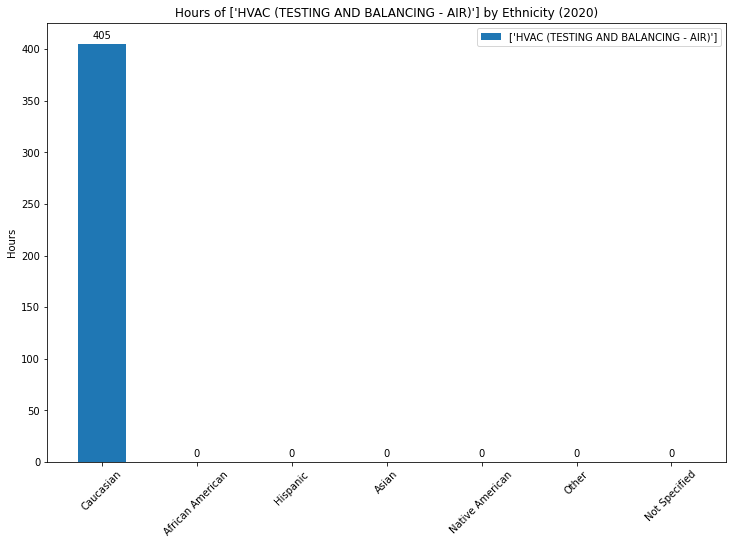

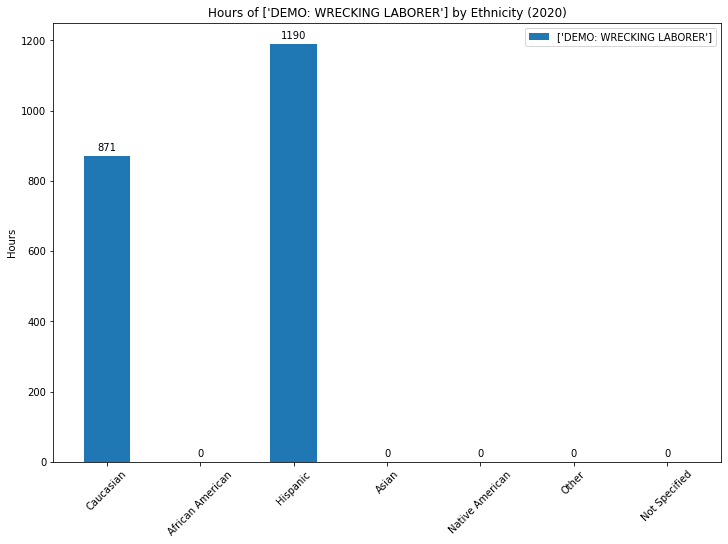

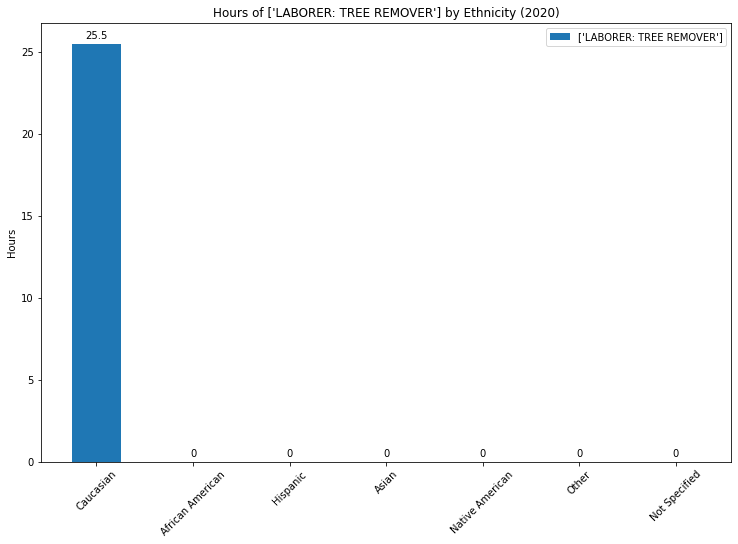

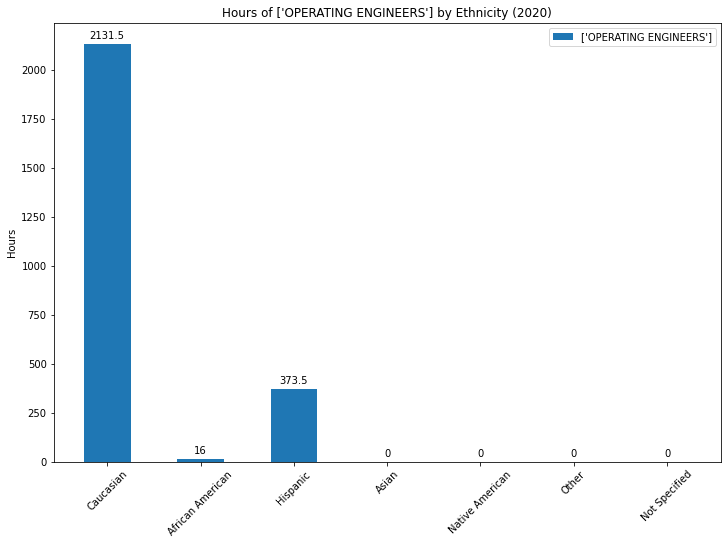

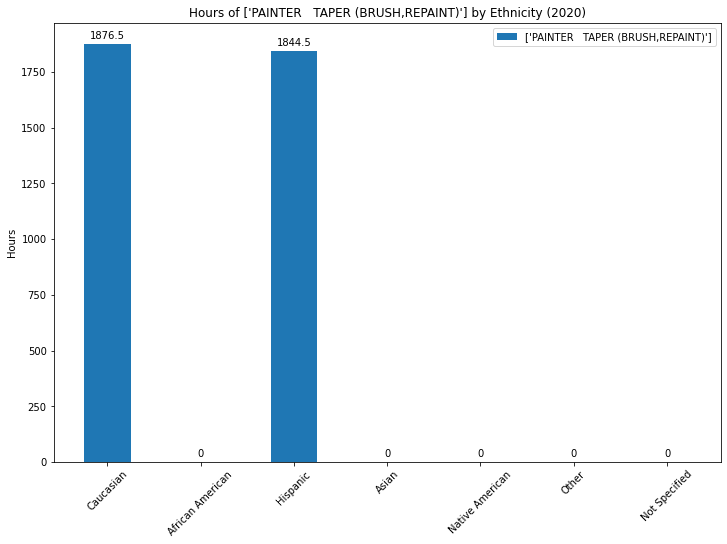

In [ ]:
graph_trade_ethnic_2020(trade_hours_2020, trade_2020)